In [21]:
import pandas as pd

allDataFlag = False

if allDataFlag:
    # Load the CSV file into a DataFrame
    pitchLogic = pd.read_csv('PitchesFrom2019-05-28To2025-01-29.csv', parse_dates=["Date"])
    worth_df = pd.read_csv('PitchesFrom2025-05-28To2025-05-28.csv', parse_dates=["Date"])
    # Merge worth_df into pitchLogic
    pitchLogic = pd.concat([pitchLogic, worth_df])
else:
    pitchLogic = pd.read_csv('PitchesFrom2025-11-01To2025-12-02.csv', parse_dates=["Date"])
    
# Combine names to Player Name, using '' for last name if it is null
pitchLogic['Last Name'] = pitchLogic['Last Name'].fillna('')
pitchLogic['Player Name'] = pitchLogic['First Name'] + ' ' + pitchLogic['Last Name']

# Check if 'Type' column exists before trying to fill NaN values
if 'Type' in pitchLogic.columns:
    pitchLogic['Type'] = pitchLogic['Type'].fillna('FF')
else:
    pitchLogic['Type'] = 'FF'

# Rename the 'Speed (mph)' column to 'Speed'
pitchLogic.rename(columns={'Speed (mph)': 'Speed'}, inplace=True)

# Display the first few rows of the DataFrame to verify
pitchLogic.head()

,Last Name,First Name,Date,Time,Memo,Type,Variant,Rating,Speed,Total Spin (rpm),Spin Efficiency (%),Spin Direction (blue),Arm Slot (yellow),Back Spin (rpm),Side Spin (rpm),Rifle Spin (rpm),Lift Force (oz),Forward Extension (ft),Backward Extension (ft),Vertical Movement (in),Horizontal Movement (in),Back Extension Time (s),Forward Extension Time (s),Launch Angle (deg),Approach Angle (deg),Approach Speed (mph),Ground Distance (ft),Ground Time (s),Ground Angle (deg),Ground Speed (mph),Delivery Time (s),Player Name
0,McAdams,Matt,2025-11-23,15:25:56,NaN,FF,NaN,0,72.8,1711,96,11:17,11:02,1527,597,-490,1.5,5.1,1.5,18.9368,-7.34730,1.763,2.136,1,-5,66.1,87,0.88,-10,63.1,2.687,Matt McAdams
1,McAdams,Matt,2025-11-23,15:25:36,NaN,FF,NaN,0,71.6,1684,96,11:13,10:55,1491,640,-452,1.4,0.0,0.0,19.9090,-7.14297,0.000,1.687,-8,-14,66.7,34,0.34,-12,68.3,2.235,Matt McAdams
2,McAdams,Matt,2025-11-23,15:25:20,NaN,CB,NaN,0,56.3,1216,84,5:00,10:40,-886,-505,-663,0.9,0.0,0.0,-15.3120,9.77488,0.000,1.316,-1,-19,53.5,43,0.54,-15,53.7,2.025,Matt McAdams
3,McAdams,Matt,2025-11-23,15:24:52,NaN,CB,NaN,0,56.1,1244,89,4:52,10:39,-919,-609,-576,0.8,5.0,1.3,-15.2474,10.31080,1.357,1.725,5,-14,52.0,61,0.78,-16,51.9,2.440,Matt McAdams
4,McAdams,Matt,2025-11-23,15:24:37,NaN,CB,NaN,0,57.3,1716,77,4:52,10:42,-1095,-727,-1103,0.7,4.7,1.3,-15.4473,10.96570,1.180,1.519,3,-15,53.1,56,0.70,-15,53.1,2.212,Matt McAdams


In [22]:
# Updated code
if 'Memo' in pitchLogic.columns:
    # Ensure 'Memo' column contains string values
    pitchLogic['Memo'] = pitchLogic['Memo'].astype(str)
    pitchLogic['Location'] = pitchLogic['Memo'].str[:1]
    pitchLogic['Intended Type'] = pitchLogic['Memo'].str[2:4]
else:
    print("Error: 'Memo' column not found in pitchLogic DataFrame")

# Ensure the new columns are created before selecting them
if all(col in pitchLogic.columns for col in ['Memo', 'Location', 'Intended Type']):
    display(pitchLogic[['First Name','Time','Memo','Location','Intended Type']])
else:
    print("Error: One or more columns ['Memo', 'Location', 'Intended Type'] not found in pitchLogic DataFrame")

,First Name,Time,Memo,Location,Intended Type
0,Matt,15:25:56,nan,n,n
1,Matt,15:25:36,nan,n,n
2,Matt,15:25:20,nan,n,n
3,Matt,15:24:52,nan,n,n
4,Matt,15:24:37,nan,n,n
5,Matt,15:24:24,nan,n,n
6,Matt,15:24:03,nan,n,n
7,Matt,15:23:46,nan,n,n
8,Matt,15:23:34,nan,n,n
9,Matt,15:21:36,nan,n,n


In [23]:
from datetime import datetime

# Skip rows that are missing Arm Slot or Spin Dir
spinDir = 'Spin Direction (blue)'
armSlot = 'Arm Slot (yellow)'
pitchLogic = pitchLogic.dropna(subset=[armSlot, spinDir])

# Convert 'Arm Slot' and 'Spin Dir' to datetime objects
pitchLogic[armSlot] = pd.to_datetime(pitchLogic[armSlot], format='%H:%M')
pitchLogic[spinDir] = pd.to_datetime(pitchLogic[spinDir], format='%H:%M')

# Compute the slot difference in minutes
pitchLogic['Slot Diff'] = (pitchLogic[armSlot] - pitchLogic[spinDir]).dt.total_seconds() / 60

# Adjust the slot difference if it is less than -360
pitchLogic.loc[pitchLogic['Slot Diff'] < -360, 'Slot Diff'] += 720

# Convert the slot difference to integer
pitchLogic['Slot Diff'] = pitchLogic['Slot Diff'].astype(int)

# Format 'Arm Slot' and 'Spin Dir' to display only time as HH:MM
pitchLogic[armSlot] = pitchLogic[armSlot].dt.strftime('%H:%M')
pitchLogic[spinDir] = pitchLogic[spinDir].dt.strftime('%H:%M')

pitchLogic[['Player Name','Time','Slot Diff',armSlot,spinDir]]

,Player Name,Time,Slot Diff,Arm Slot (yellow),Spin Direction (blue)
0,Matt McAdams,15:25:56,-15,11:02,11:17
1,Matt McAdams,15:25:36,-18,10:55,11:13
2,Matt McAdams,15:25:20,340,10:40,05:00
3,Matt McAdams,15:24:52,347,10:39,04:52
4,Matt McAdams,15:24:37,350,10:42,04:52
5,Matt McAdams,15:24:24,344,10:40,04:56
6,Matt McAdams,15:24:03,325,10:44,05:19
7,Matt McAdams,15:23:46,-13,10:42,10:55
8,Matt McAdams,15:23:34,-6,10:47,10:53
9,Matt McAdams,15:21:36,-11,10:42,10:53


In [24]:
!pip install img2pdf
import img2pdf


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [25]:
# Define Interquantile Range as a custom aggregation function
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

def movementTable (player_df):
    """ create a table of horizontal and vertical movement, computing the 'quantile area' of all pitch types and movement
    
    Args:
        player_df (DataFrame): PitchLogic DataFrame with 'Horizontal Movement (in)' and 'Vertical Movement (in)'

    Return:
        filename (String): filename of PDF in which the image is stored
    """
    # Compute summary stats for Horizontal and Vertical Movement
    movement_summary = player_df.groupby("Type").agg({
        "Horizontal Movement (in)": [
            ('mean', 'mean'),
            ('IQR', iqr),
            ('count', 'count')
        ],
        "Vertical Movement (in)": [
            ('mean', 'mean'),
            ('IQR', iqr)
        ]
    })

    movement_summary['Area'] = movement_summary[('Horizontal Movement (in)', 'IQR')] * movement_summary[('Vertical Movement (in)', 'IQR')]
    movement_summary['Horizontal Mean'] = movement_summary[('Horizontal Movement (in)', 'mean')]
    movement_summary['Vertical Mean'] = movement_summary[('Vertical Movement (in)', 'mean')]
    movement_summary['Count'] = movement_summary[('Horizontal Movement (in)', 'count')]

    # Round the results for readability
    movement_summary = movement_summary.round(2)

    # Select only the Mean columns and the Area column
    movement_summary = movement_summary[['Vertical Mean', 'Horizontal Mean', 'Area', 'Count']]
        
    movementTablefig, movementTableax = plt.subplots(figsize=(7, 4))
    movementTableax.axis('tight')
    movementTableax.axis('off')
    table = movementTableax.table(cellText=movement_summary.values, colLabels=['Vertical Mean', 'Horizontal Mean', 'IQR Area','Number of Pitches'], rowLabels=movement_summary.index, cellLoc='center', loc='center', colWidths=[0.2 for x in movement_summary.columns])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Adjust the scale as needed
    movementTablefig.suptitle('Movement by Pitch Type for ' + playerDisplay)
    filename = playerfigStorage + '/Movement Table.jpg'
    movementTablefig.savefig(filename)
    return filename

In [26]:
def slotDifferenceTable (player_df):
    """ create a table of arm slot, spin direction, and slot difference data
    computing the summary data for all pitch types
    
    Args:
        player_df (DataFrame): PitchLogic DataFrame with 'Arm Slot (yellow)', 'Spin Direction (blue)' and 'Slot Diff'

    Return:
        filename (String): filename of PDF in which the image is stored
    """

    # change the spin direction and arm slot values to datetime values in order to compute mean
    player_df['Spin Direction'] = pd.to_datetime(player_df['Spin Direction (blue)'], format='%H:%M')
    player_df['Arm Slot'] = pd.to_datetime(player_df['Arm Slot (yellow)'], format='%H:%M')

    # Compute summary stats
    slot_summary = player_df.groupby("Type").agg({
        "Spin Direction": [
            ('min', 'min'),
            ('max', 'max'),
            ('mean', 'mean'),
            ('IQR', iqr),
            ('count', 'count')
        ],
        "Arm Slot": [
            ('min', 'min'),
            ('max', 'max'),
            ('mean', 'mean'),
            ('IQR', iqr)
        ],
        "Slot Diff": [
            ('min', 'min'),
            ('max', 'max'),
            ('mean', 'mean'),
            ('IQR', iqr)
        ],
        "Spin Efficiency (%)": [
            ('min', 'min'),
            ('max', 'max'),
            ('mean', 'mean'),
            ('IQR', iqr)
        ]
    })

    slot_summary['Slot Mean'] = slot_summary[('Arm Slot', 'mean')].dt.strftime('%-I:%M')
    slot_summary['Slot Min'] = slot_summary[('Arm Slot', 'min')].dt.strftime('%-I:%M')
    slot_summary['Slot Max'] = slot_summary[('Arm Slot', 'max')].dt.strftime('%-I:%M')
    slot_summary['Spin Mean'] = slot_summary[('Spin Direction', 'mean')].dt.strftime('%-I:%M')
    slot_summary['Spin Min'] = slot_summary[('Spin Direction', 'min')].dt.strftime('%-I:%M')
    slot_summary['Spin Max'] = slot_summary[('Spin Direction', 'max')].dt.strftime('%-I:%M')
    slot_summary['Slot Diff Mean'] = slot_summary[('Slot Diff', 'mean')].round(2)
    slot_summary['Efficiency Mean'] = slot_summary[('Spin Efficiency (%)', 'mean')].round(1)
    slot_summary['Count'] = slot_summary[('Spin Direction', 'count')]

    # Select only some columns
    slot_summary = slot_summary[['Slot Min', 'Slot Mean', 'Slot Max', 'Spin Min', 'Spin Mean', 'Spin Max', 'Slot Diff Mean', 'Efficiency Mean', 'Count']]

    # Wrap long labels manually by adding \n
    wrapped_col_labels = [
        'Min Arm\nSlot',
        'Mean Arm\nSlot',
        'Max Arm\nSlot',
        'Min Spin\nDirection',
        'Mean Spin\nDirection',
        'Max Spin\nDirection',
        'Mean Slot\nDifference',
        'Mean Spin\nEfficiency',
        'Number of\nPitches'
    ]
    # Build table with custom column widths (wider first column for row labels)
    col_widths = [0.1] + [0.1 for _ in wrapped_col_labels[1:]]
        
    slotTablefig, slotTableax = plt.subplots(figsize=(9, 6))
    slotTableax.axis('tight')
    slotTableax.axis('off')
    table = slotTableax.table(cellText=slot_summary.values, colLabels=wrapped_col_labels, rowLabels=slot_summary.index, cellLoc='center', loc='center', colWidths=col_widths)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Adjust the scale as needed
    # Double the height of the header row
    for key, cell in table.get_celld().items():
        row, col = key
        if row == 0:  # header row
            cell.set_height(cell.get_height() * 2.2)
        else:
            cell.set_height(cell.get_height() * 1.2)
    slotTablefig.suptitle('Arm Slot and Spin Direction\nby Pitch Type for ' + playerDisplay)
    filename = playerfigStorage + '/Slot Differences Table.jpg'
    slotTablefig.savefig(filename)
    return filename

In [27]:
def movementCharting (player_df, type):
    """ create a chart of horizontal and vertical movement with a box around 'quantile area' showing where pitches go (separate function for creating a table of all pitch types and movement)
    
    Args:
        player_df (DataFrame): PitchLogic DataFrame with 'Horizontal Movement (in)' and 'Vertical Movement (in)'
        type (string): pitch type to chart

    Return:
        filename (String): filename of PDF in which the image is stored
    """

    movement_df = player_df[player_df['Type']==type]
    movefig = sns.relplot(x='Horizontal Movement (in)', y='Vertical Movement (in)', data=movement_df, kind='scatter')
        
    # Calculate mean and confidence intervals
    mean_horiz = movement_df['Horizontal Movement (in)'].mean()
    mean_vert = movement_df['Vertical Movement (in)'].mean()
    ci_horiz = movement_df['Horizontal Movement (in)'].quantile([0.25, 0.75])
    ci_vert = movement_df['Vertical Movement (in)'].quantile([0.25, 0.75])
#    mid_ci_horiz = (ci_horiz[0.75] - ci_horiz[0.25])/2 + ci_horiz[0.25]
#    mid_ci_vert = (ci_vert[0.75] - ci_vert[0.25])/2 + ci_vert[0.25]
    
    for ax in movefig.axes.flat:
#        ax.axhline(mean_vert, color='red', linestyle='--')
#        ax.axhline(ci_vert[0.25], color='blue', linestyle='--')
        ax.hlines(ci_vert[0.25], ci_horiz[0.25], ci_horiz[0.75], color='blue')
        ax.hlines(ci_vert[0.75], ci_horiz[0.25], ci_horiz[0.75], color='blue')
        ax.vlines(ci_horiz[0.25], ci_vert[0.25], ci_vert[0.75], color='blue')
        ax.vlines(ci_horiz[0.75], ci_vert[0.25], ci_vert[0.75], color='blue')
        # 2 inches from midle of confidence interval
#       ax.hlines(mid_ci_vert, mid_ci_horiz-2, mid_ci_horiz+2, color='green')
#       ax.hlines(mid_ci_vert, mid_ci_horiz-2, mid_ci_horiz+2, color='green')
#       ax.vlines(ci_horiz[0.25], mid_ci_vert-2, mid_ci_vert+2, color='green')
#       ax.vlines(ci_horiz[0.75], mid_ci_vert-2, mid_ci_vert+2, color='green')

    
    movefig.fig.subplots_adjust(top=0.85)  # Adjust the top to make space for the title
    movefig.fig.suptitle(type + ' Movement Profile for ' + playerDisplay, y=0.90)  # Move the title upward
    filename = playerfigStorage + '/' + type + ' Movement Profile.jpg'
    movefig.savefig(filename)
    return filename


In [28]:
def velocityTable(player_df):
    """ create a table of velocity by pitches type
    
    Args:
        player_df (DataFrame): PitchLogic DataFrame with 'Speed' and 'Type'

    Return:
        filename (String): filename of PDF in which the image is stored
    """
    
    # Grouping and aggregating the data
    summary_df = player_df.groupby('Type')['Speed'].agg(['max', 'median', 'mean', 'min']).round(2)
    velotablefig, velotableax = plt.subplots(figsize=(7, 4))
    velotableax.axis('tight')
    velotableax.axis('off')
    table = velotableax.table(cellText=summary_df.values, colLabels=summary_df.columns, rowLabels=summary_df.index, cellLoc='center', loc='center', colWidths=[0.15 for x in summary_df.columns])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Adjust the scale as needed
    velotablefig.suptitle('Velocity by Pitch Type for ' + playerDisplay)
    filename = playerfigStorage + '/Velocity Table.jpg'
    velotablefig.savefig(filename)
    imagefiles.append(filename)
    plt.close(velotablefig)

    summary_df = player_df.groupby(player_df['Date'].dt.date)['Speed'].agg(['max', 'median', 'mean', 'min']).round(2)
    velodatefig, velodateax = plt.subplots(figsize=(7, 4))
    velodateax.axis('tight')
    velodateax.axis('off')
    velodatetable = velodateax.table(cellText=summary_df.values, colLabels=summary_df.columns, rowLabels=summary_df.index, cellLoc='center', loc='center', colWidths=[0.15 for x in summary_df.columns])
    filename = playerfigStorage + '/Velocity by Date Table.jpg'
    velodatefig.savefig(filename)
    return filename


In [29]:
def slotMovementChart (player_df, overUnder="Over"):
    """ create a chart of horizontal and vertical movement with a box around 'quantile area' showing where pitches go (separate function for creating a table of all pitch types and movement)
    
    Args:
        player_df (DataFrame): PitchLogic DataFrame with 'Horizontal Movement (in)' and 'Vertical Movement (in)'
        overUnder (String): Should pitches be those over 100 minutes difference between arm slot and spin direction or under

    Return:
        filename (String): filename of PDF in which the image is stored
    """
    if overUnder == 'Under':
        only100_player_df = player_df[abs(player_df['Slot Diff'])<=100]
    else:
        only100_player_df = player_df[abs(player_df['Slot Diff'])>100]
        
    only100_player_df = only100_player_df.dropna(subset=['Location'])
    only100_player_df.loc[only100_player_df['Location'] != 'K', 'Location'] = 'BB'
    if len(only100_player_df) == 0:
        return None
    slotfig = sns.relplot(x='Horizontal Movement (in)', y='Vertical Movement (in)', data=only100_player_df, kind='scatter', hue='Slot Diff', size='Location', size_order=['K','BB'], style='Type')
    slotfig.fig.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
    slotfig.fig.suptitle('Slot Difference and Movement Profile for ' + playerDisplay + " (Difference " + overUnder + " 100)")
    filename = playerfigStorage + '/Slot Movement' + overUnder +'.jpg'
    slotfig.savefig(filename)
    return filename


<Figure size 640x480 with 0 Axes>

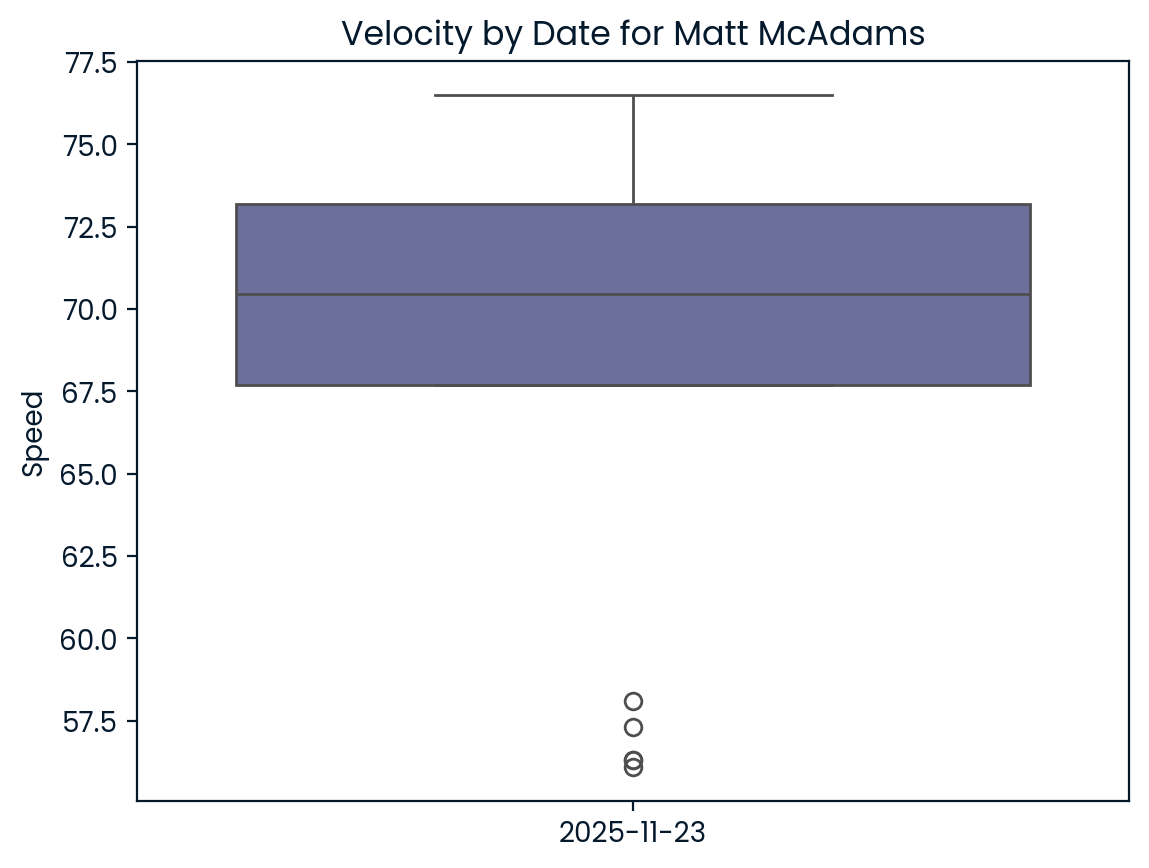

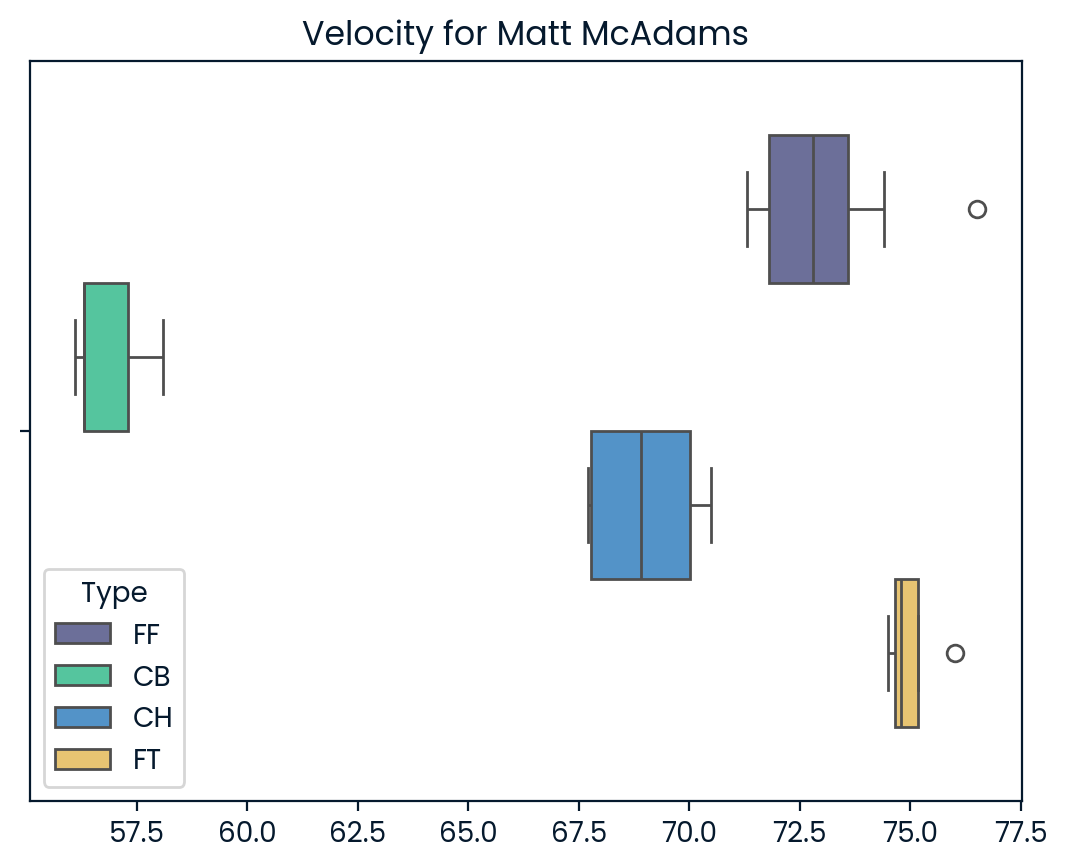

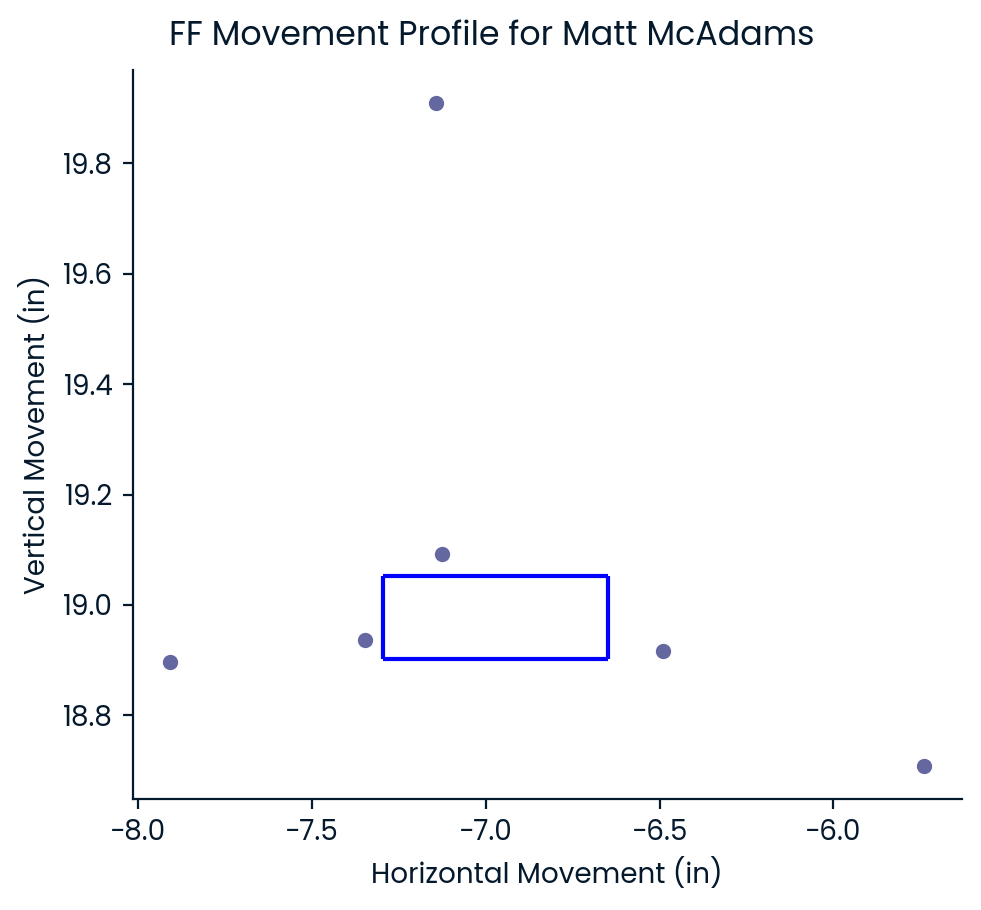

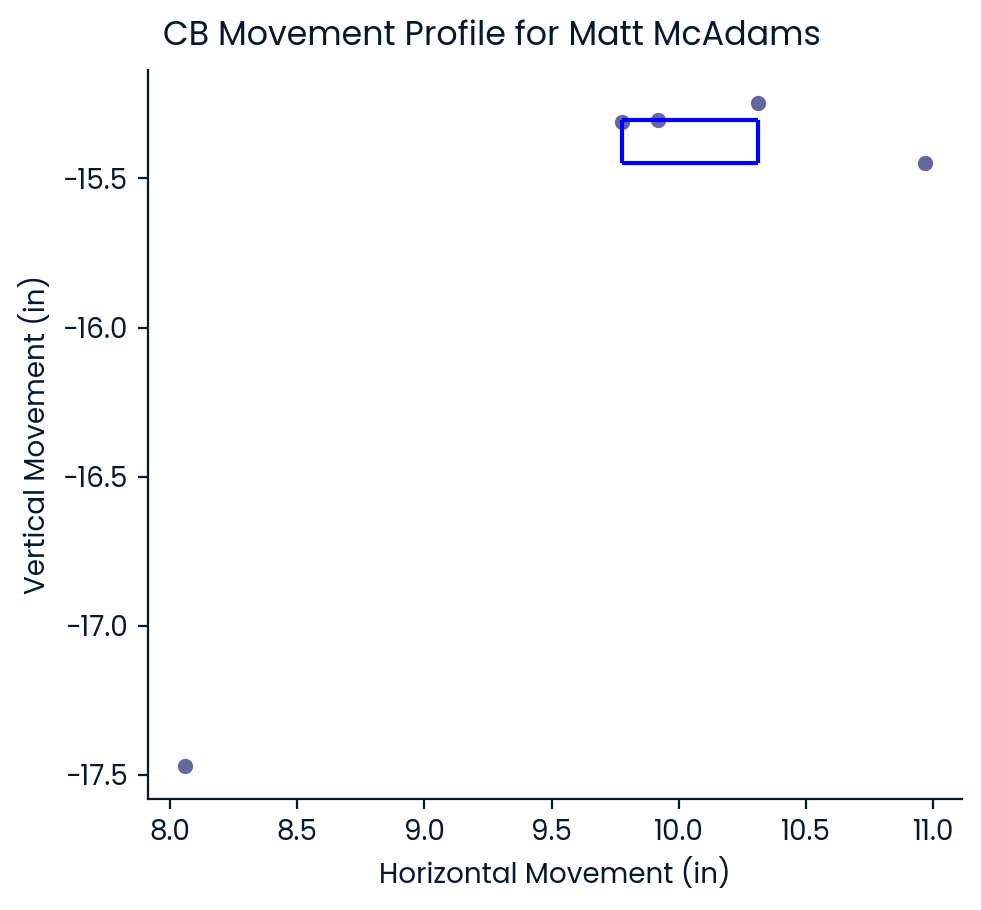

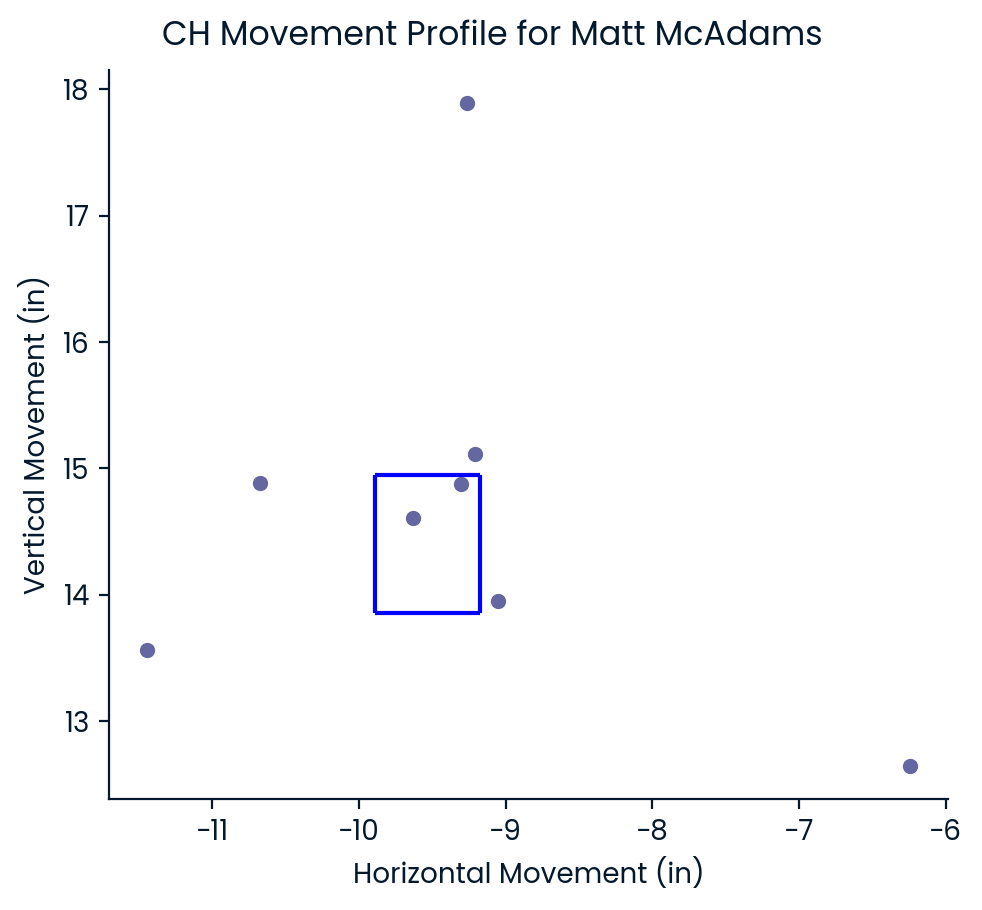

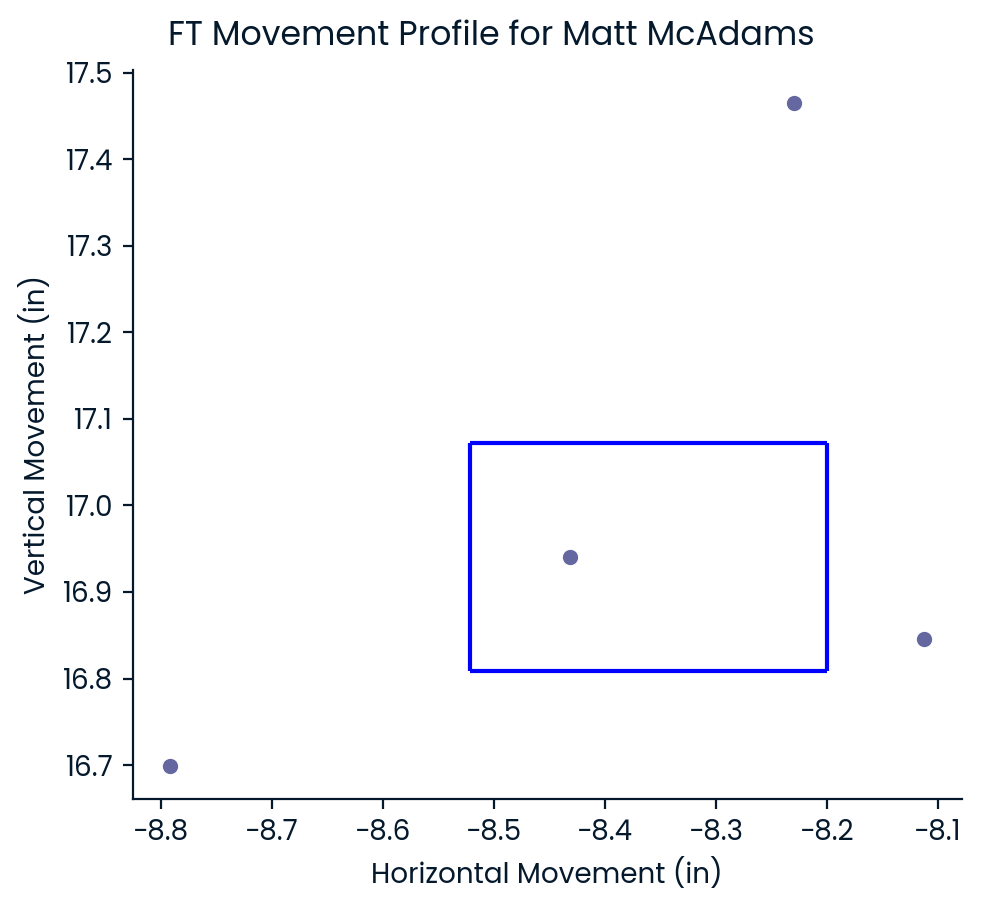

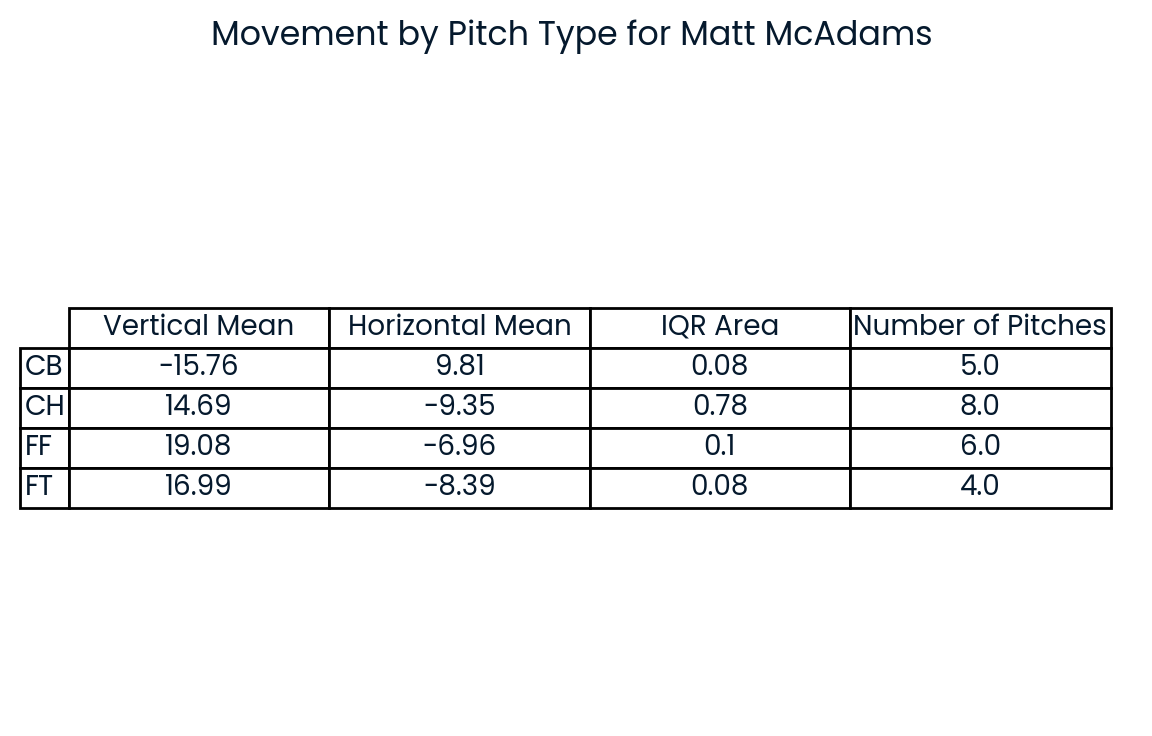

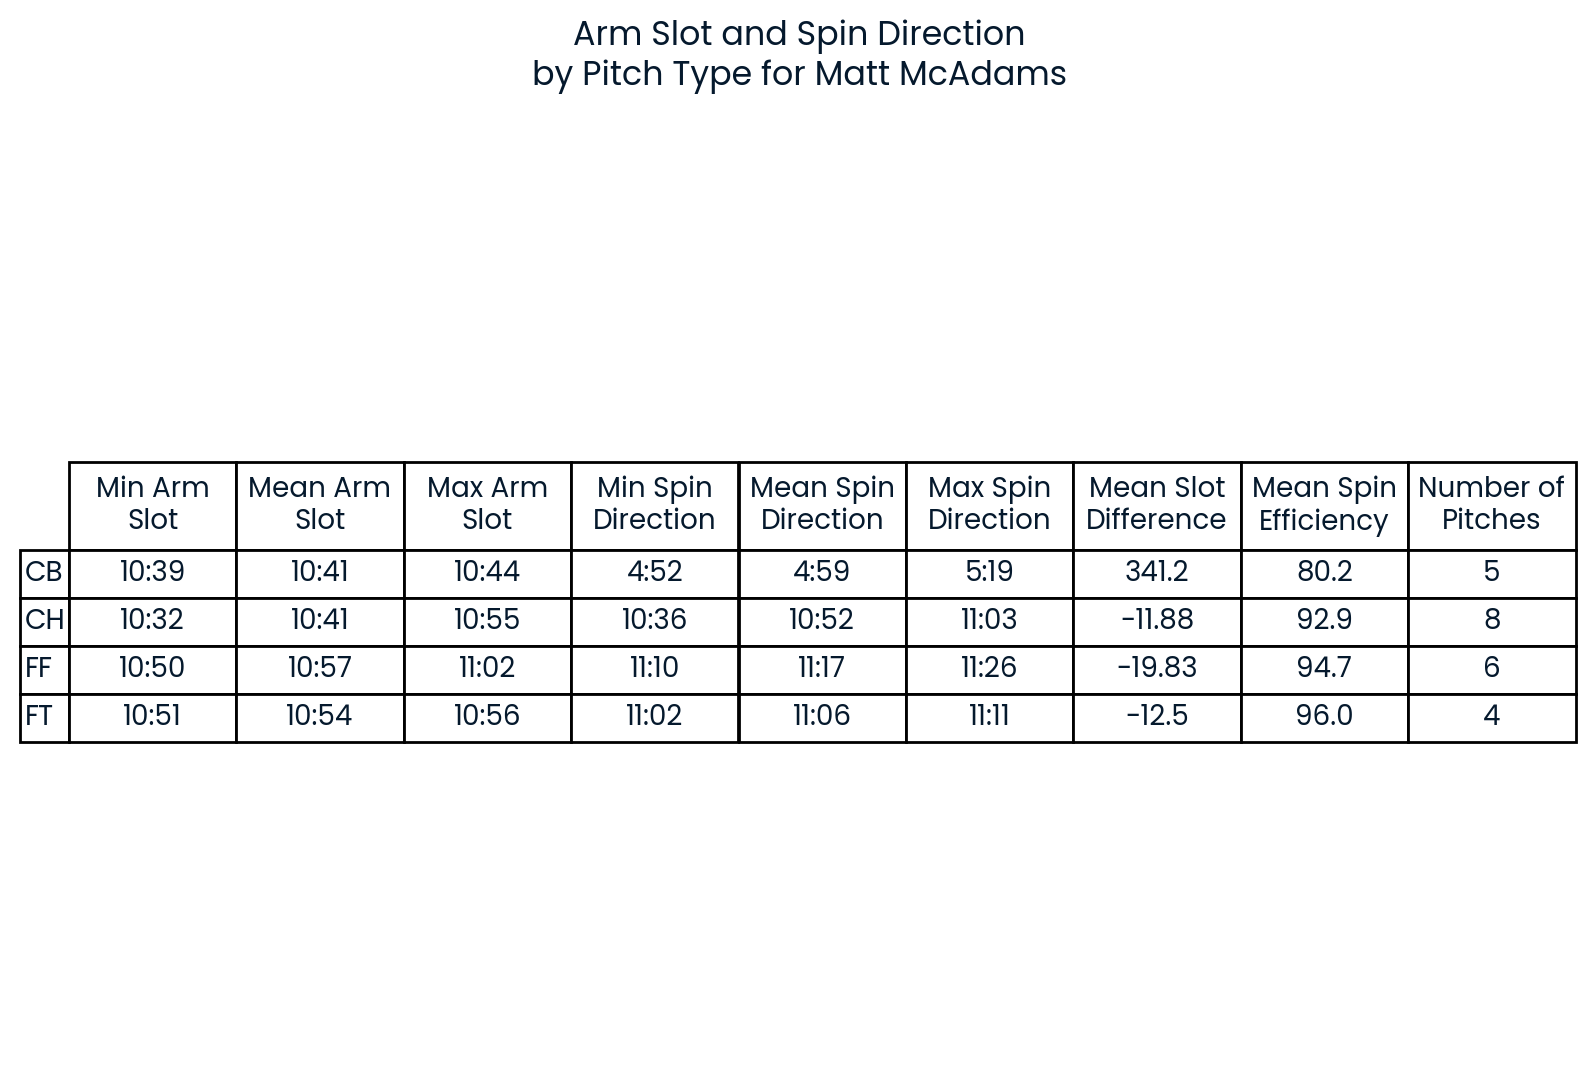

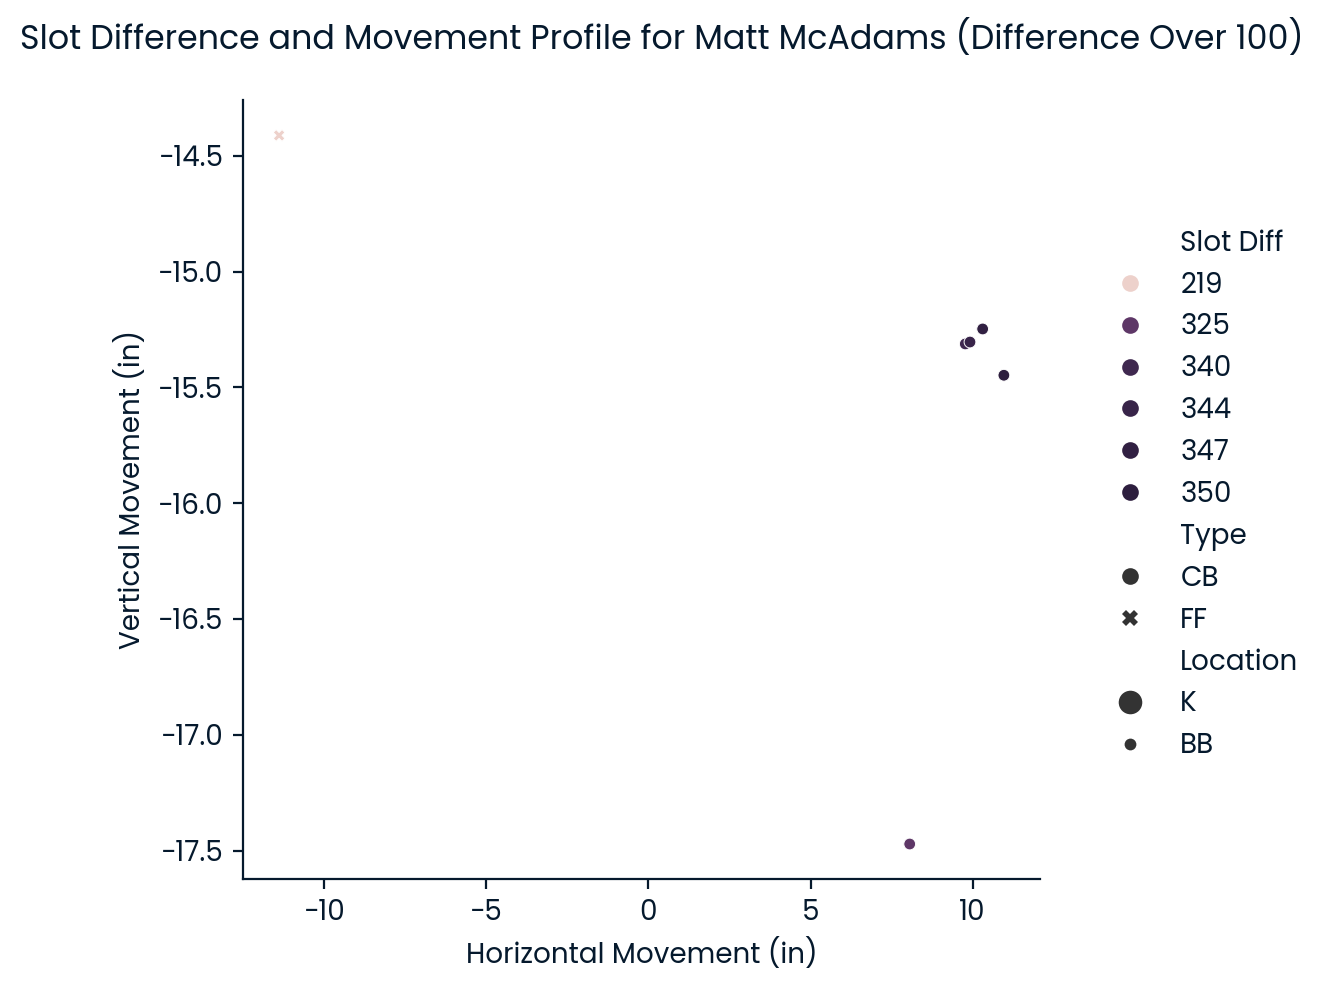

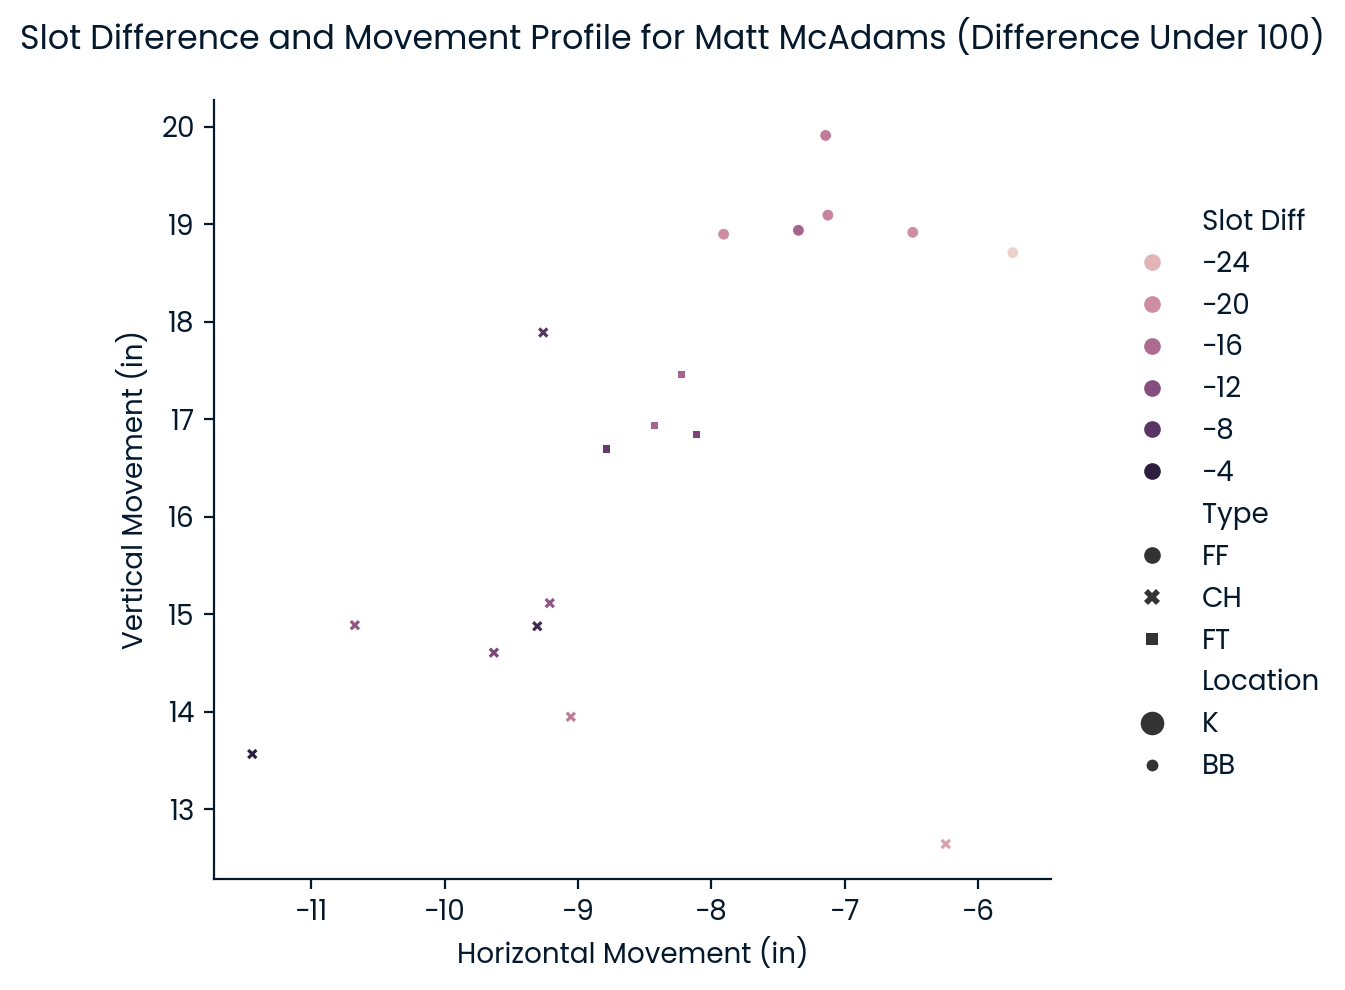

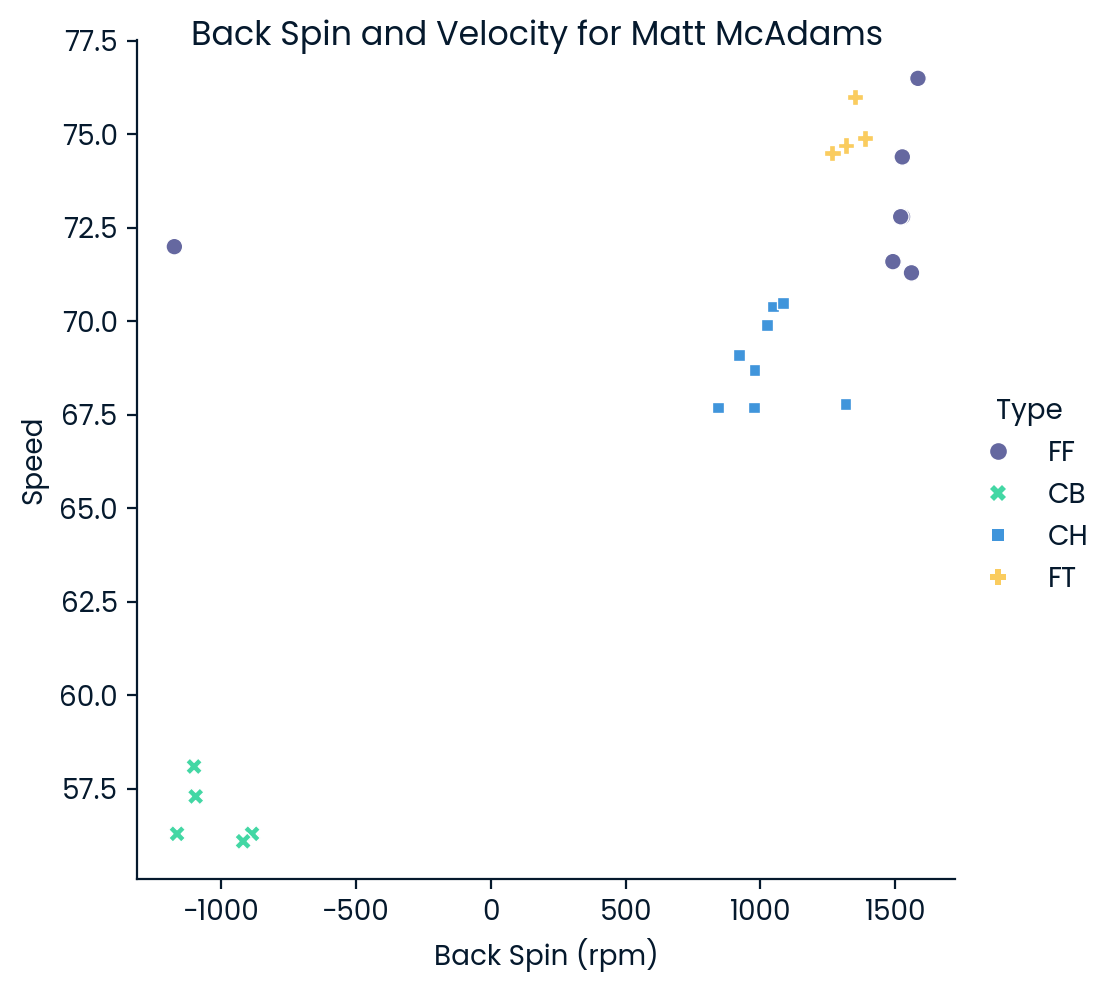

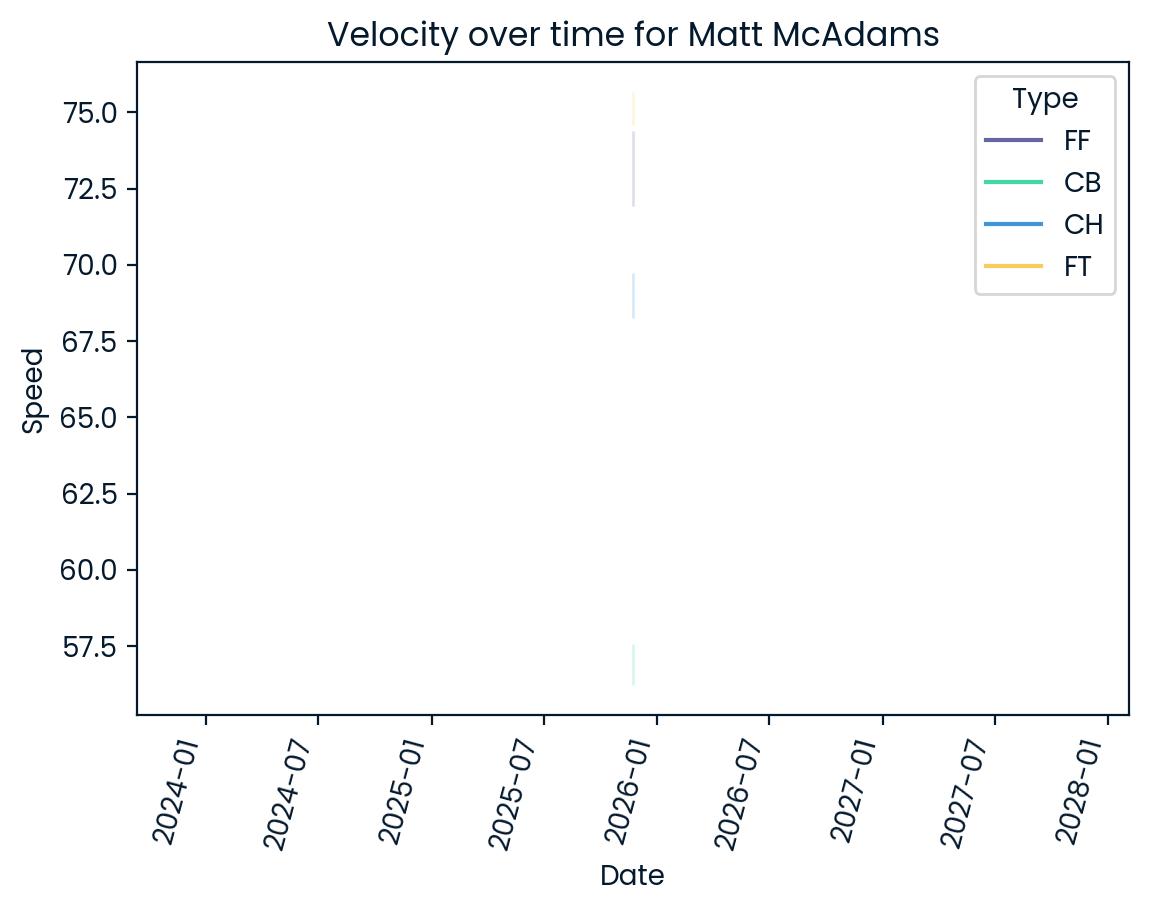

<Figure size 700x400 with 0 Axes>

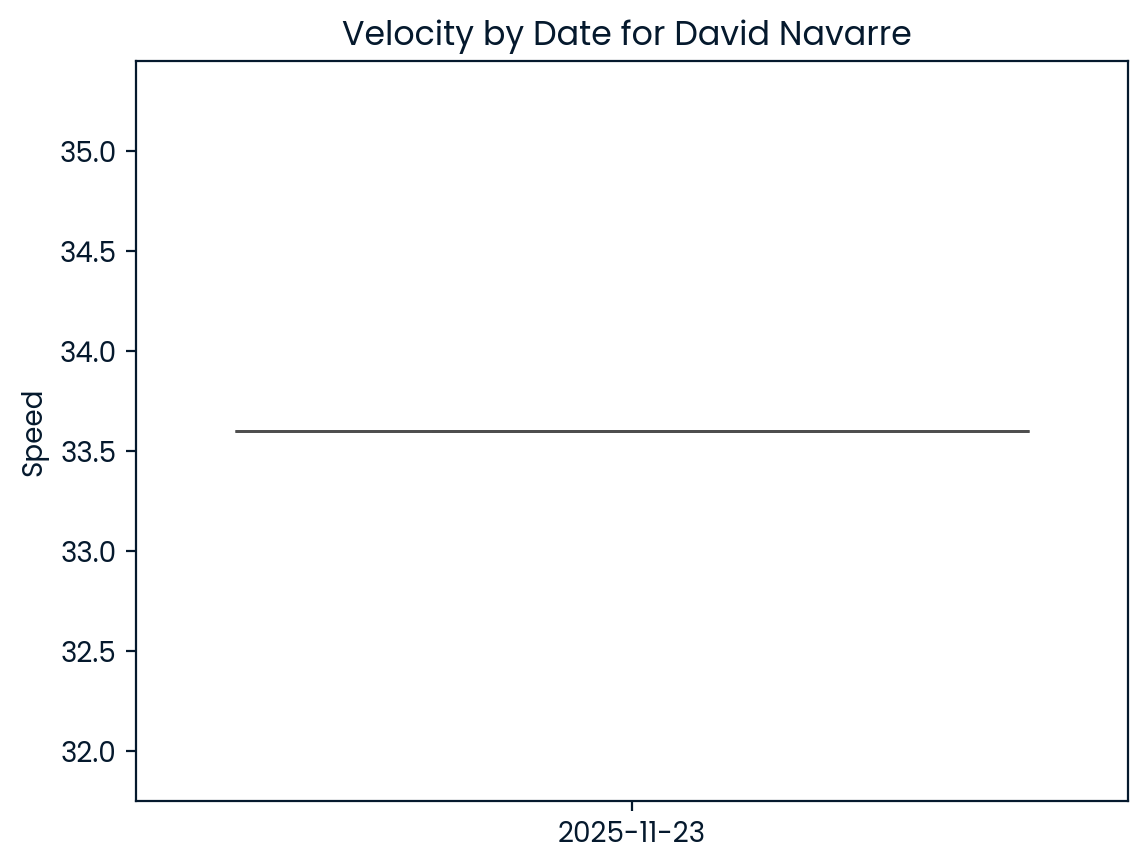

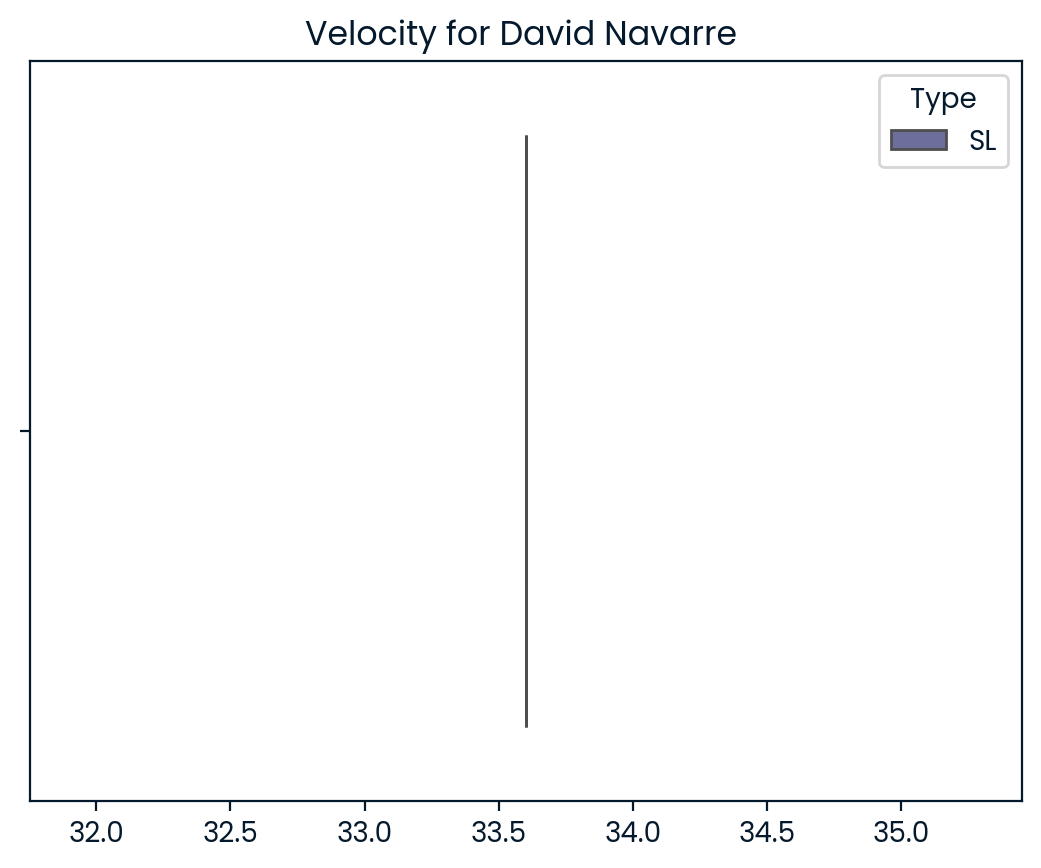

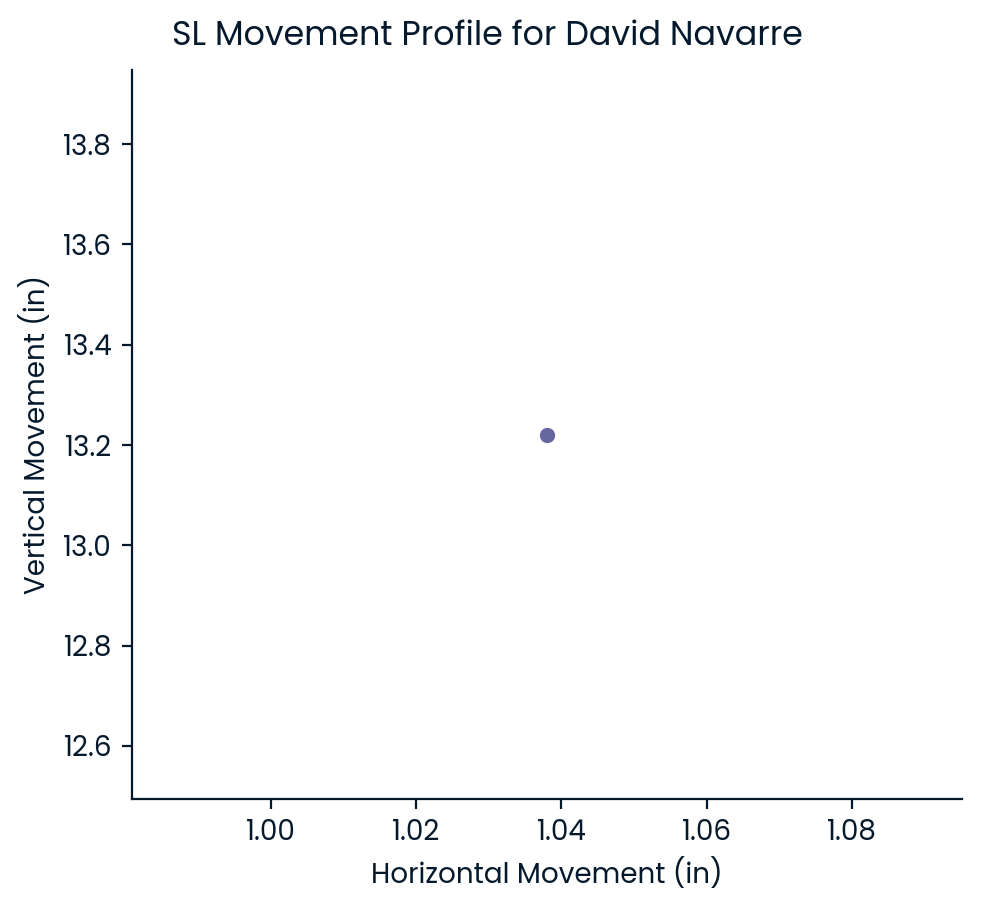

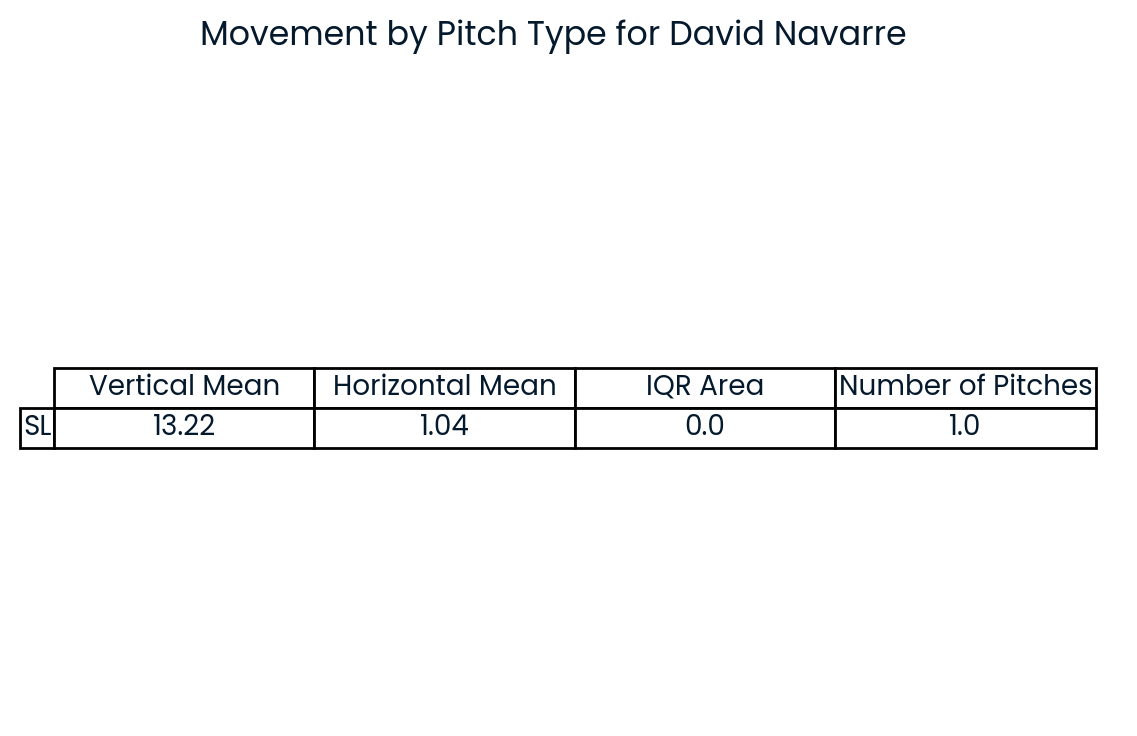

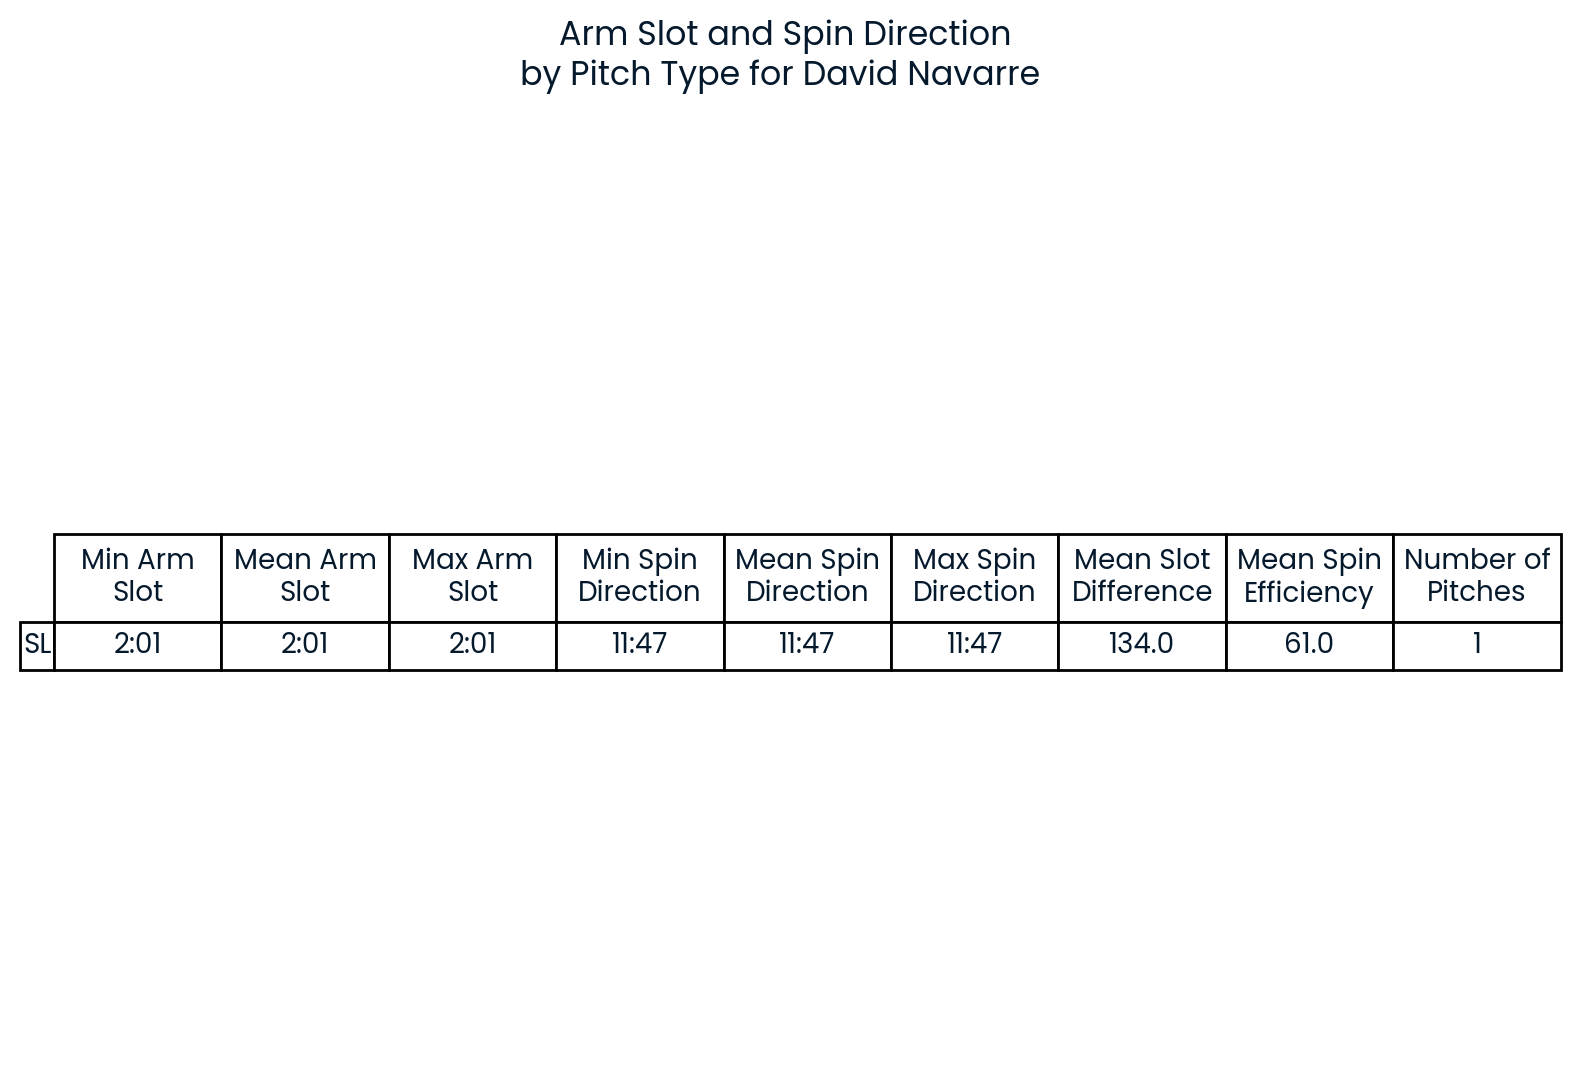

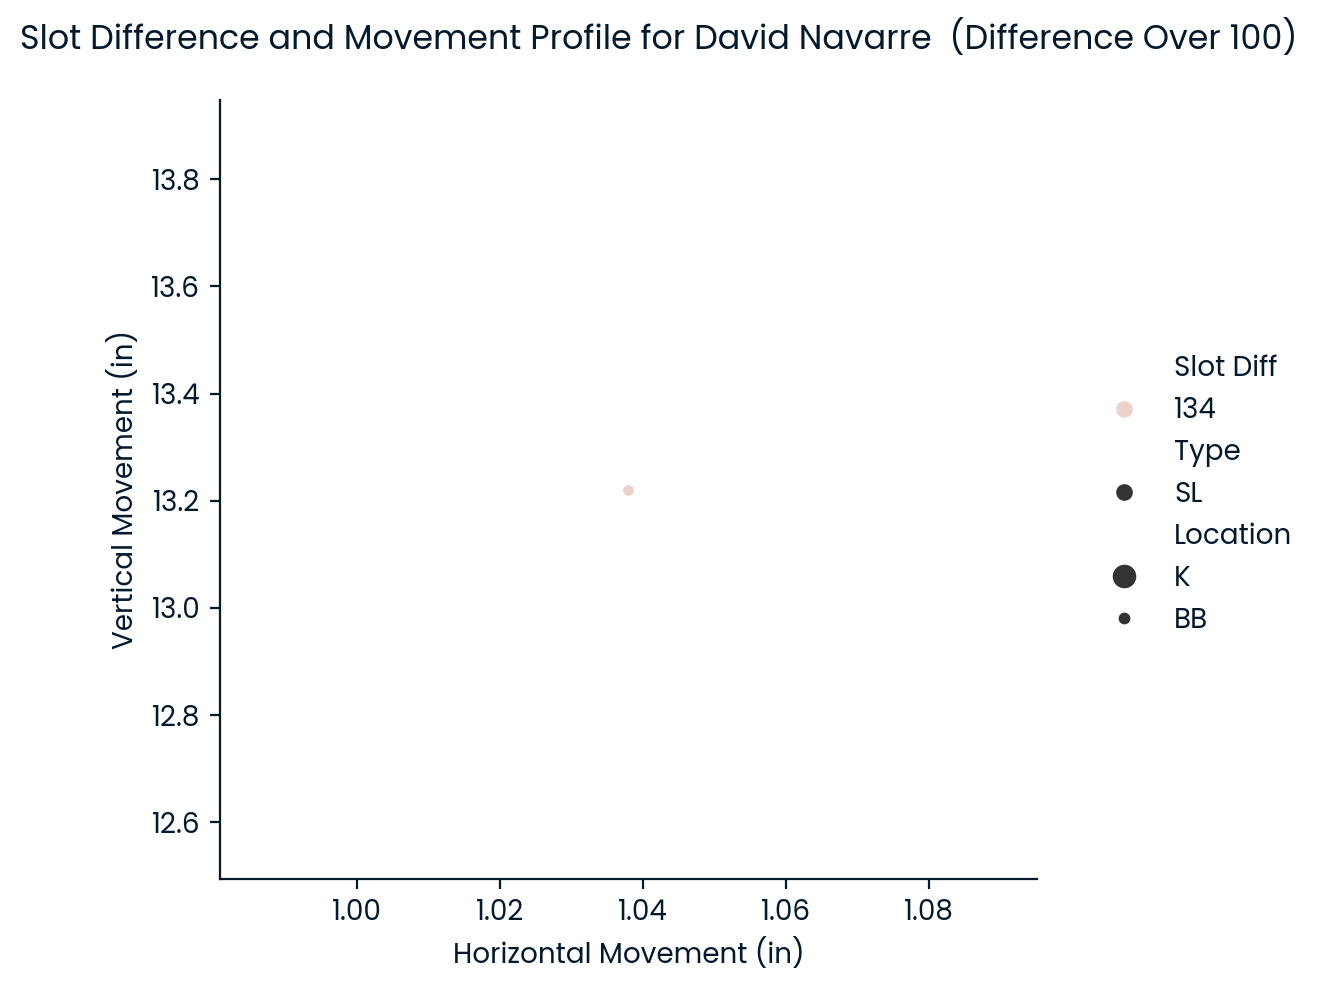

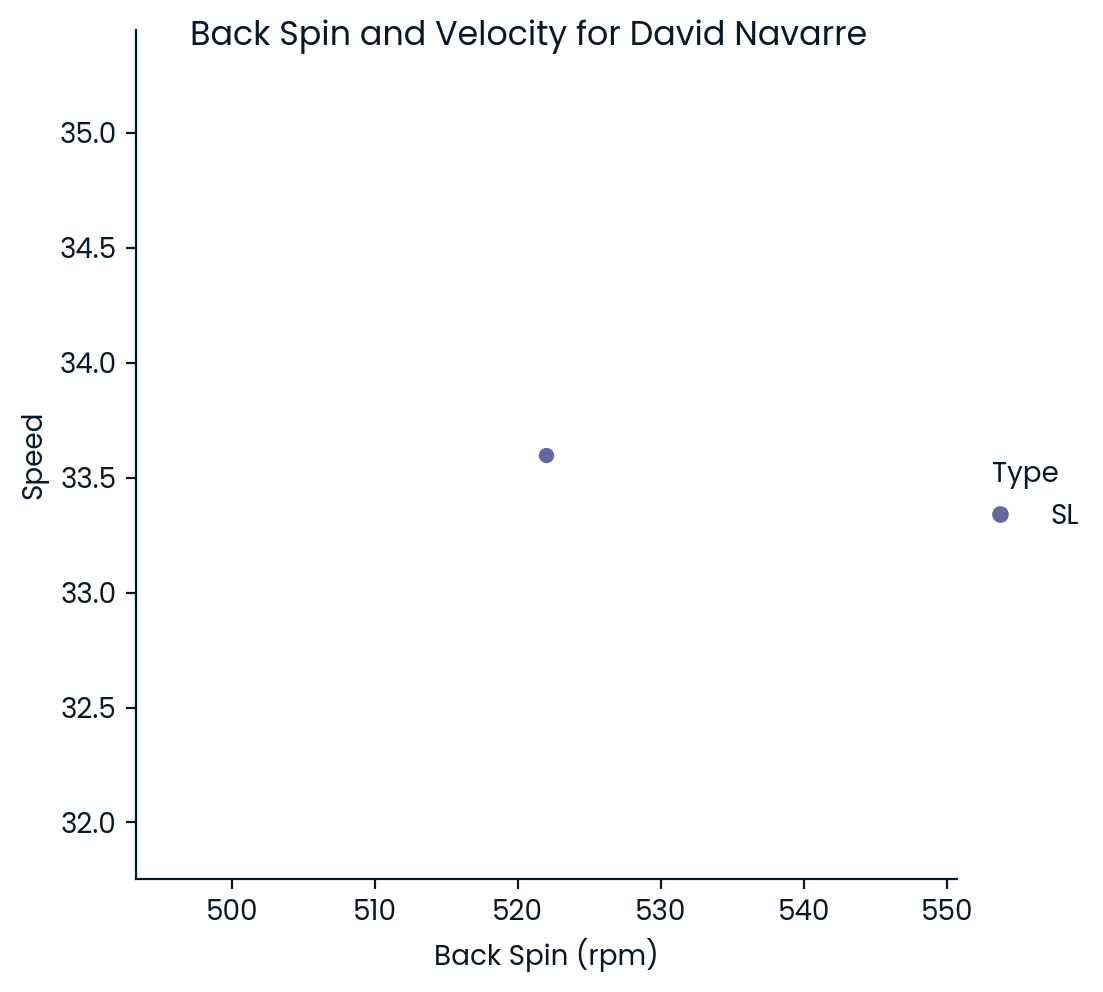

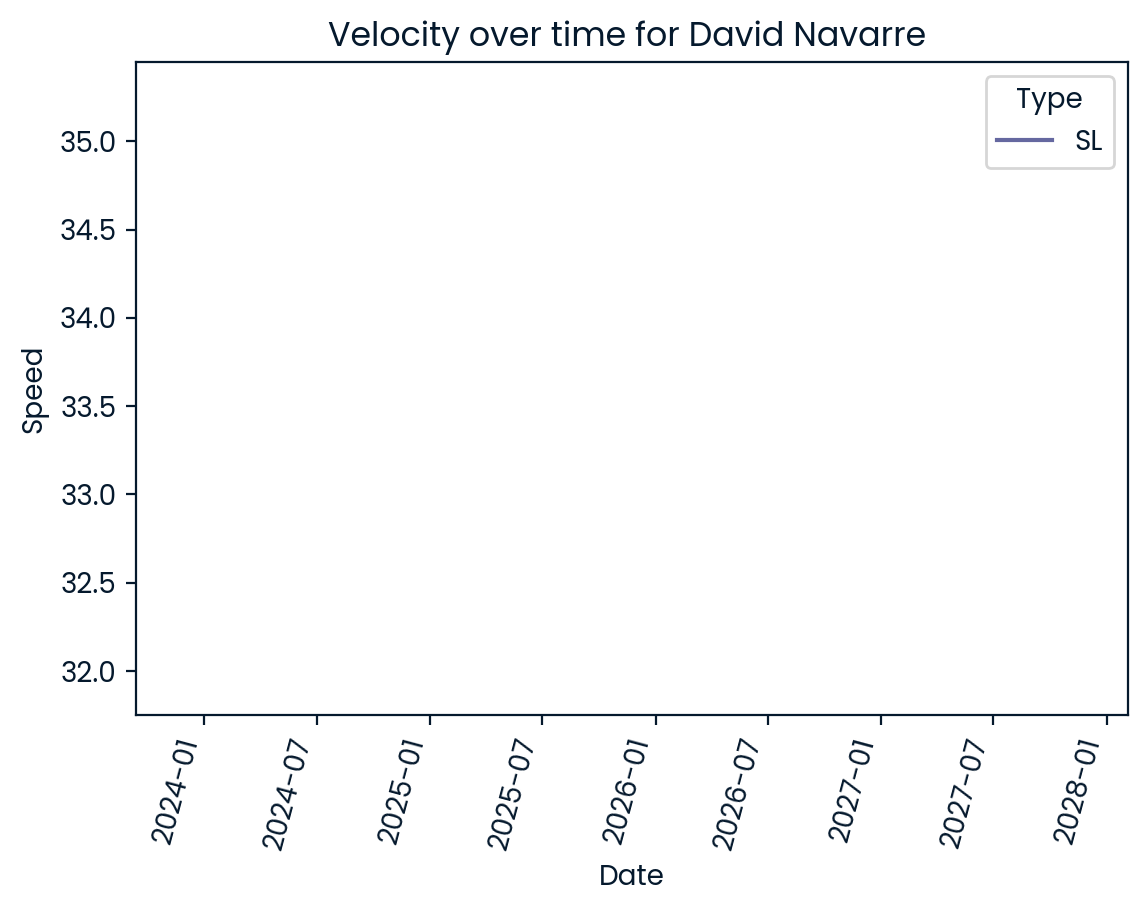

<Figure size 700x400 with 0 Axes>

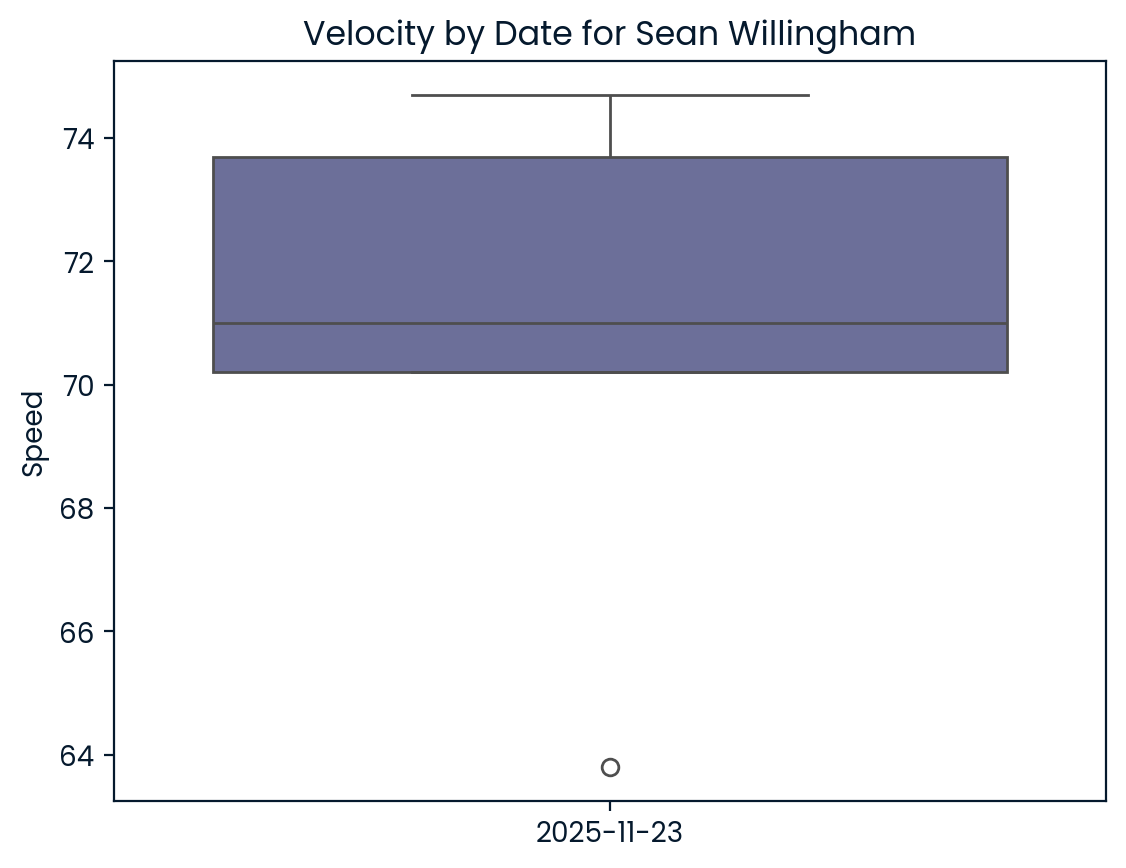

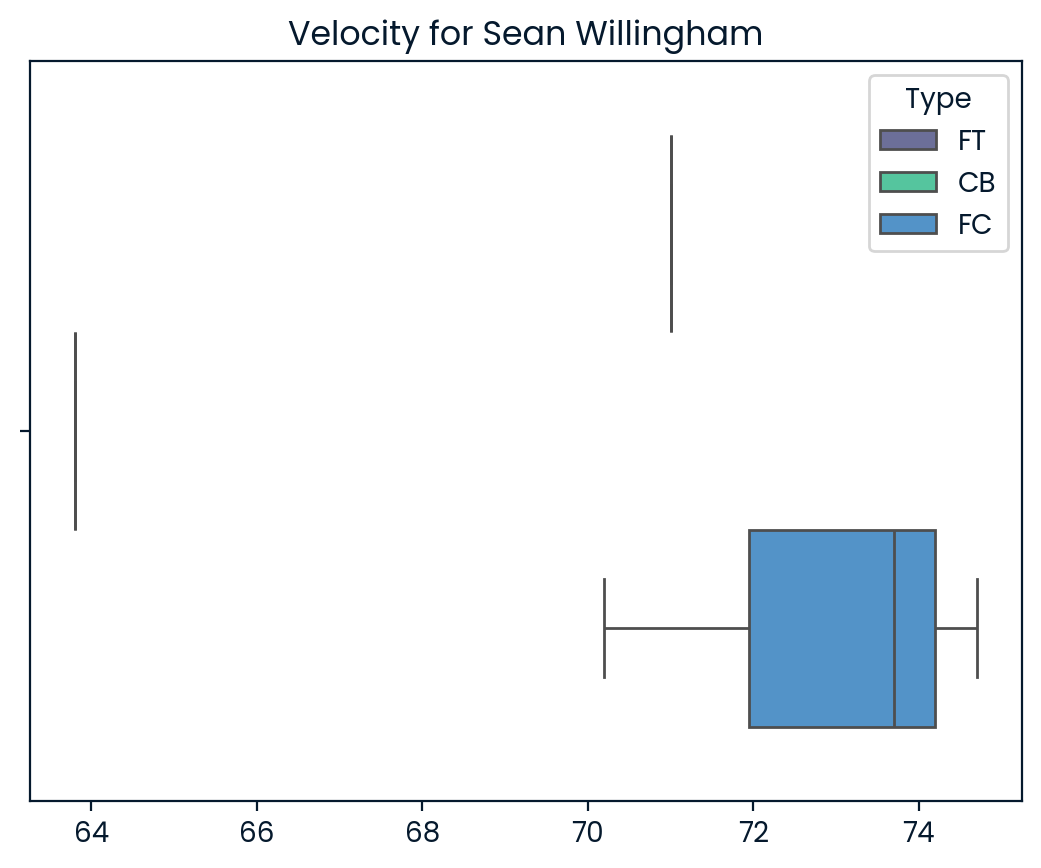

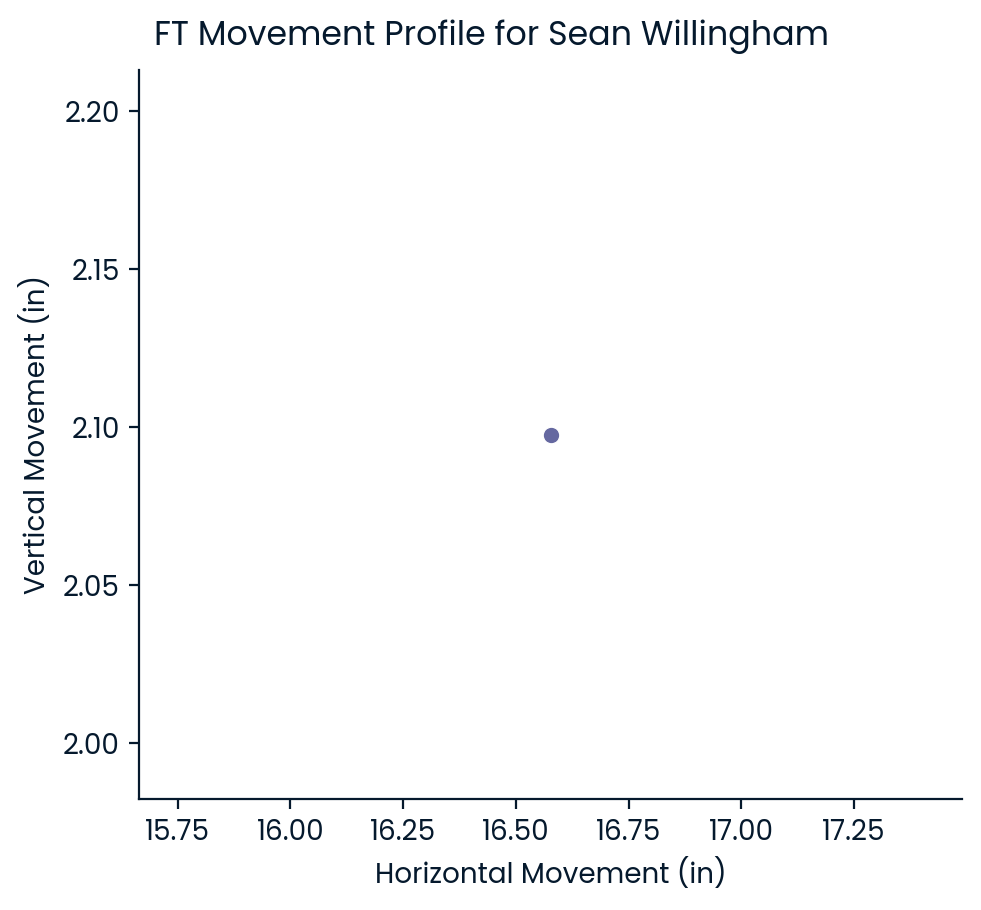

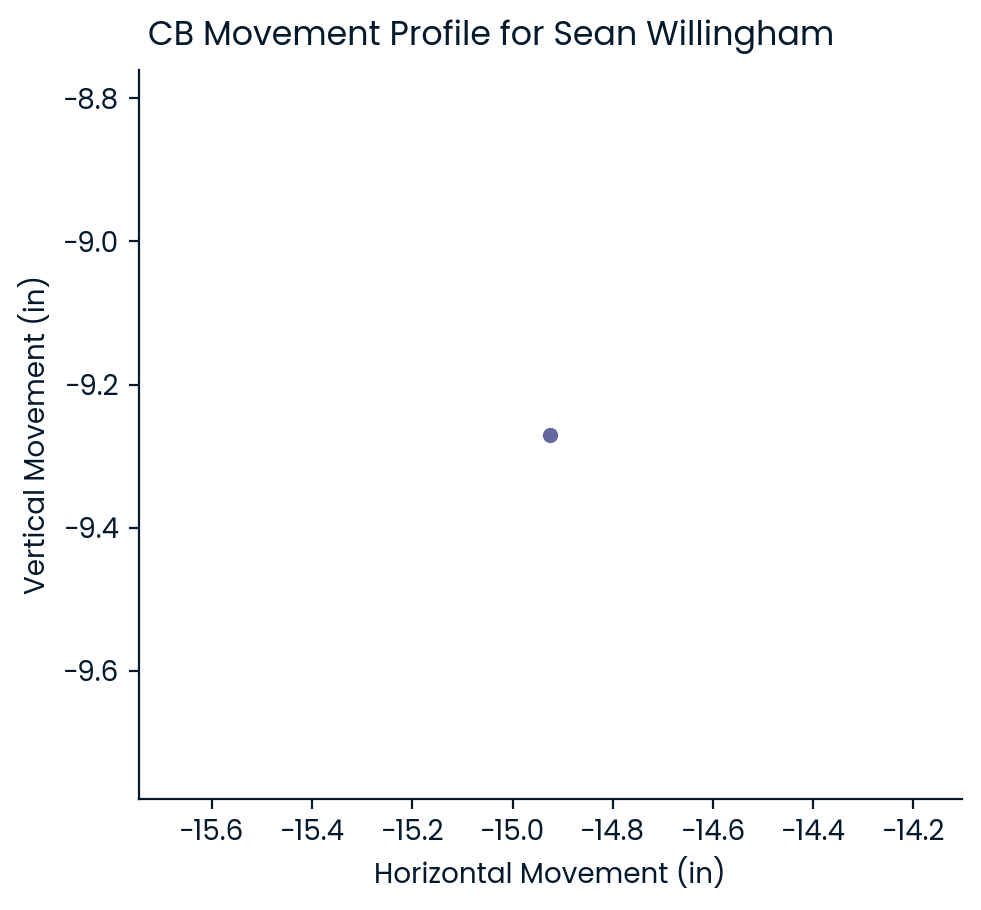

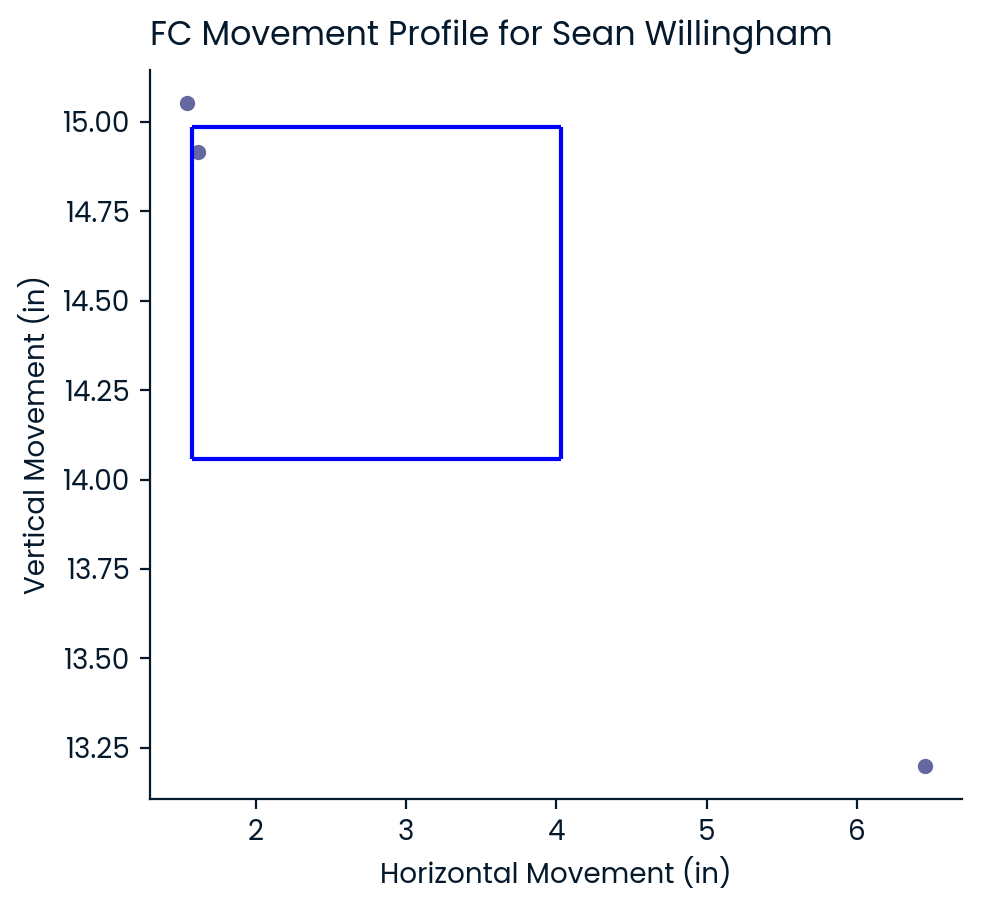

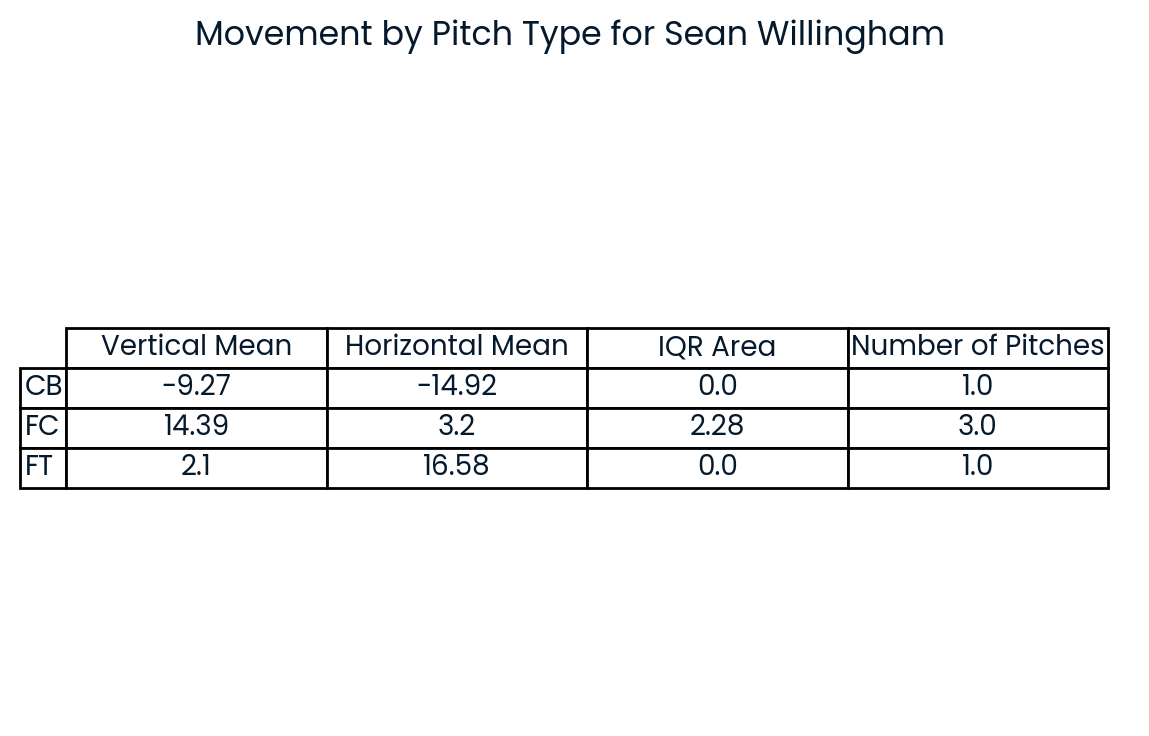

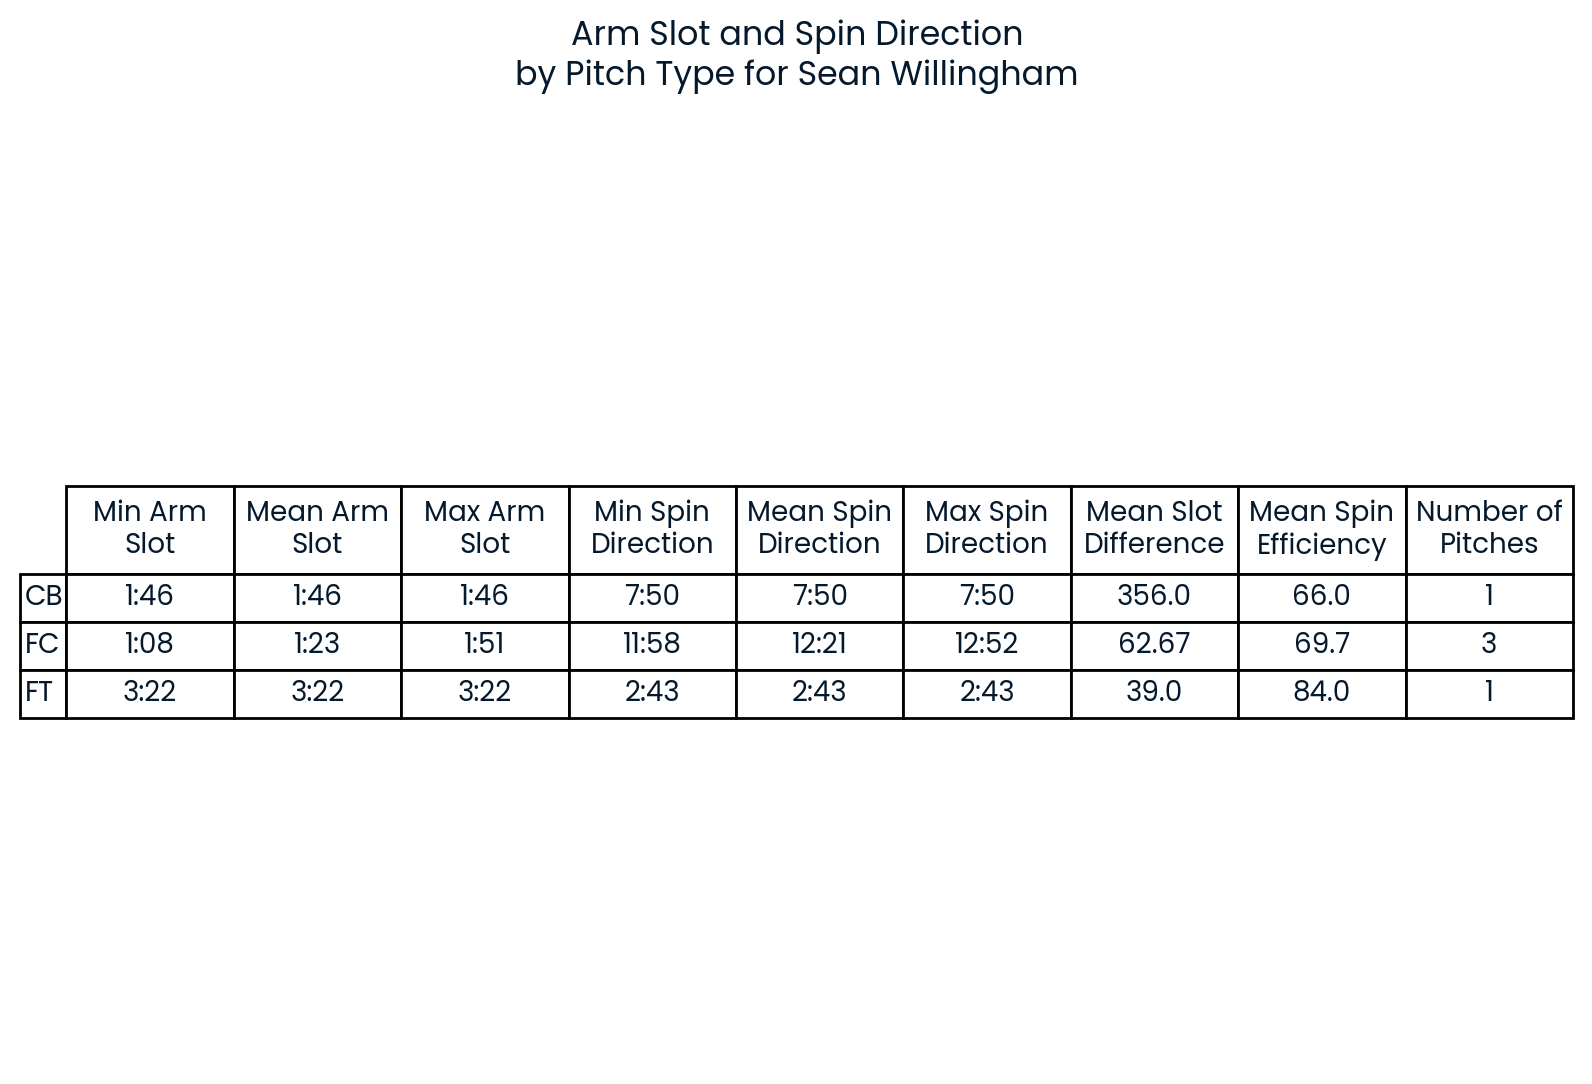

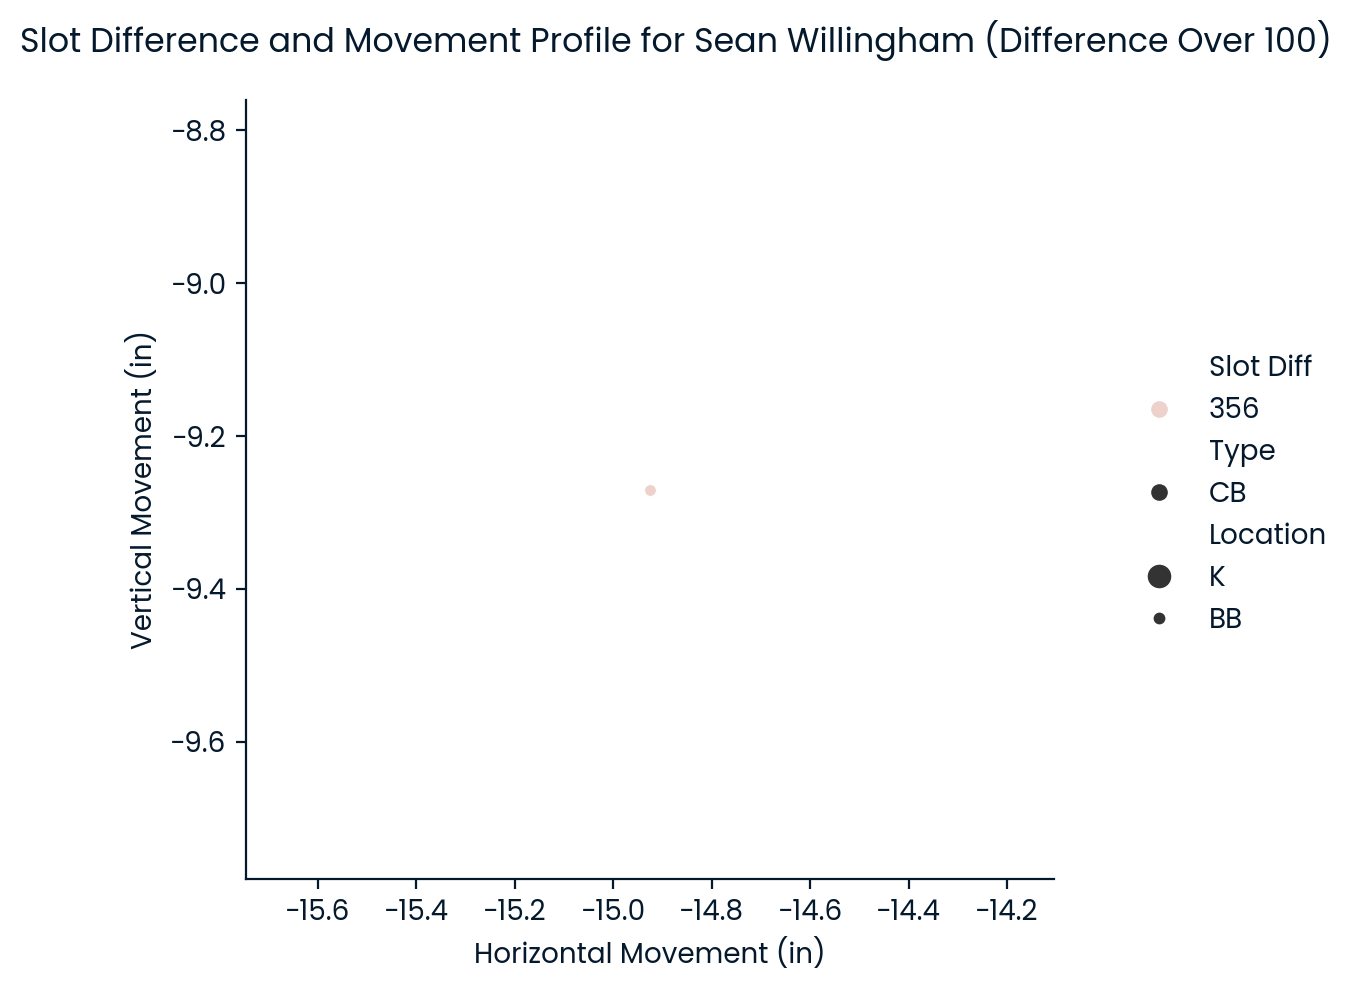

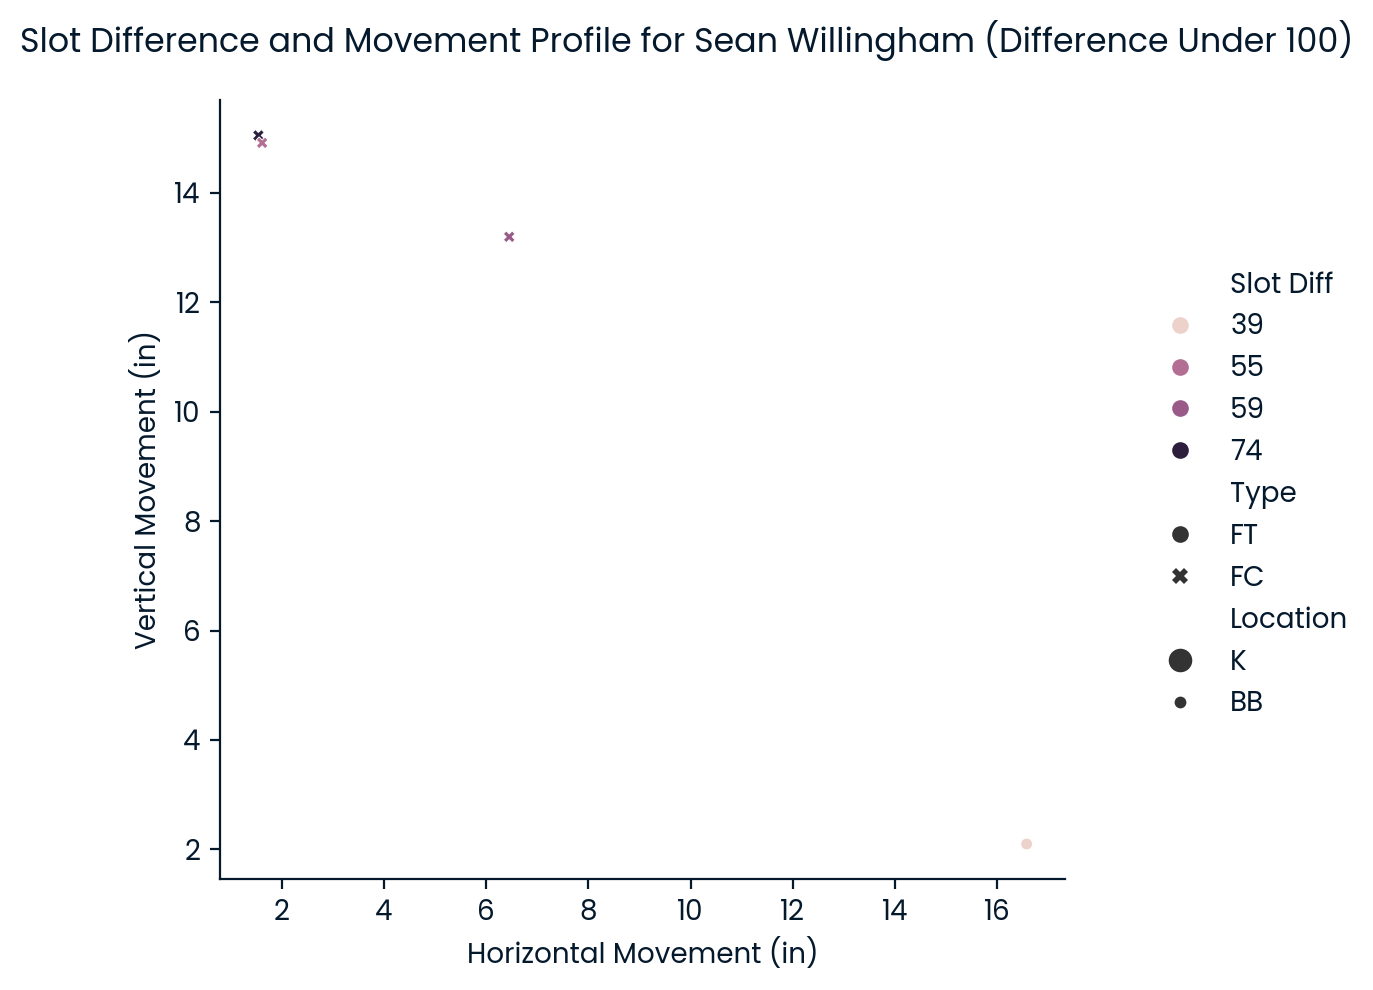

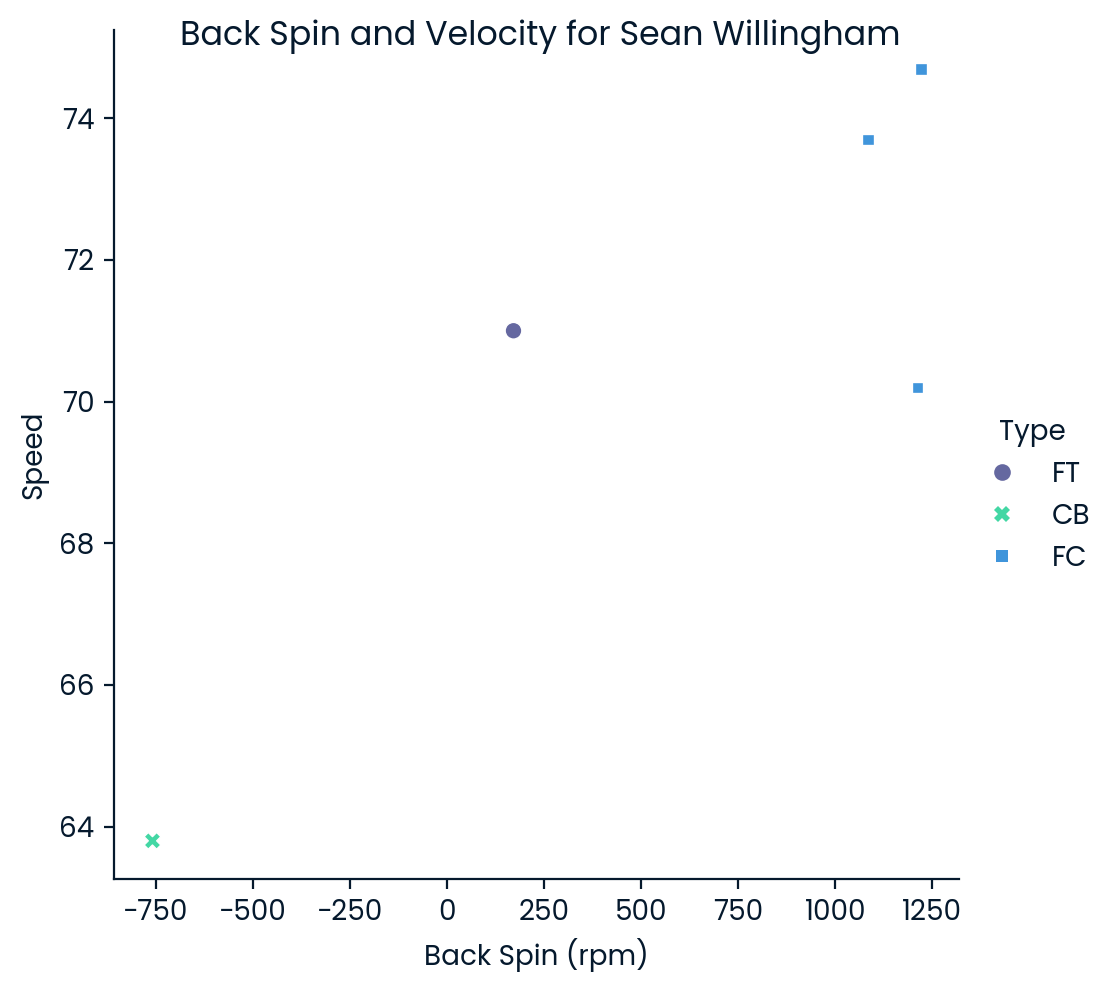

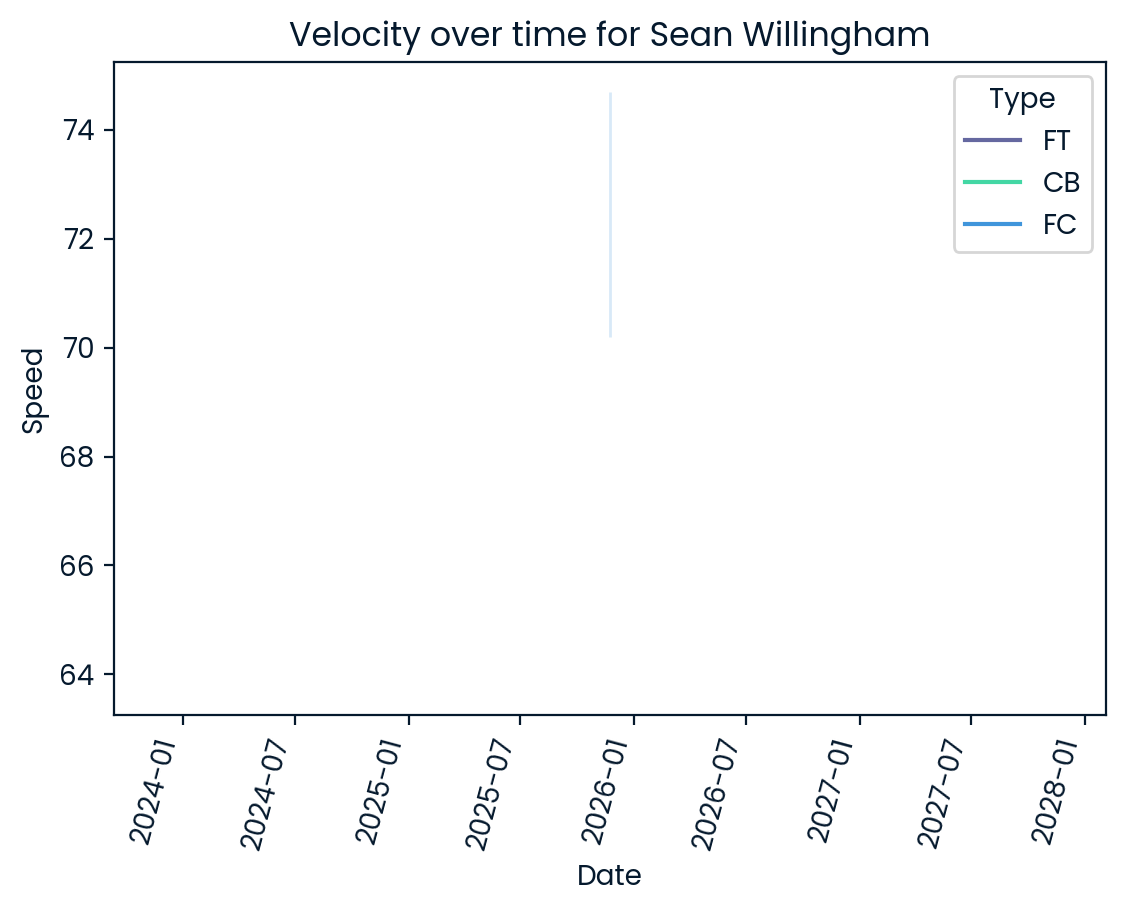

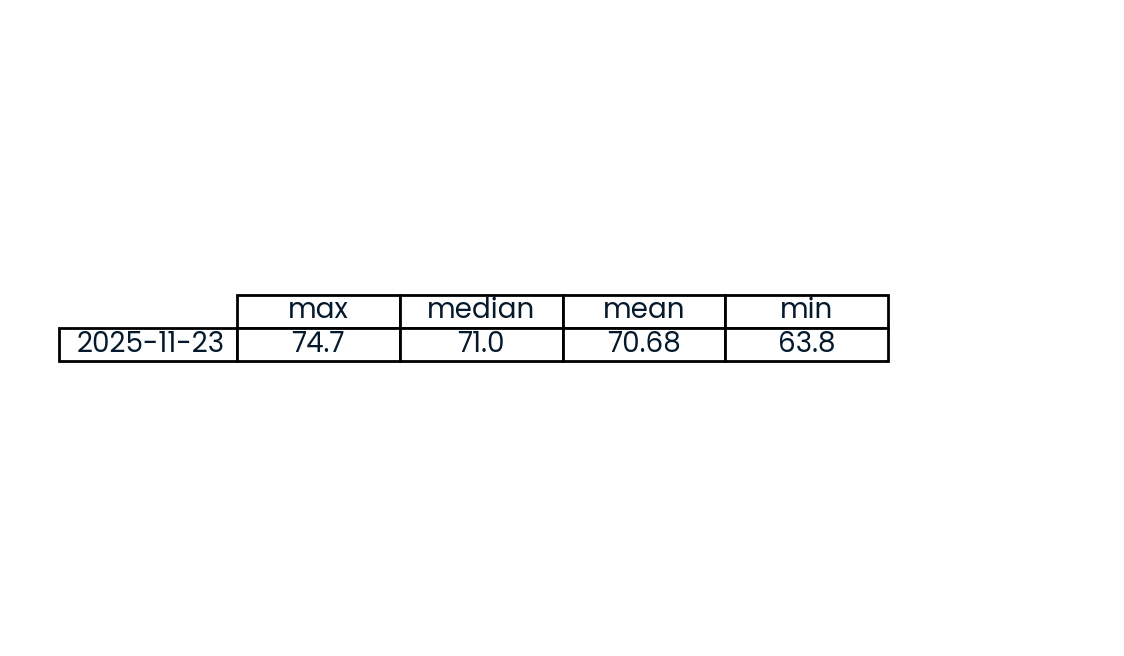

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import img2pdf
import os
from matplotlib.backends.backend_pdf import PdfPages

season = '2025'
team = 'Higher Achievement Baseball Academy'
directory = season + team
figStorage = 'Fig Storage'
byDateArrayFiles = []

# Ensure the directories exist
os.makedirs(directory, exist_ok=True)
os.makedirs(figStorage, exist_ok=True)

playerNames = pitchLogic['Player Name'].unique()
#playerNames = ['Worth Elston']

figsToCreate = { 'Location':True,
               'LocationPie':True,
               'SpeedDateBox':True,
               'SpeedBox':True,
               'MovementProfile':True,
               'BackspinVelo':True,
               'VeloByDate':False,
               'SlotDifferences':False,
               'SlotMovement':False,
               'VeloTable':True
               }

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

for player in playerNames:
    playerDisplay = player
    player_df = pitchLogic[pitchLogic['Player Name'] == player]
    imagefiles = []
    playerfigStorage = 'Fig Storage/' + playerDisplay
    os.makedirs(playerfigStorage, exist_ok=True)

    categoryOrder = ['1','2','3','4','K','6','7','8','9']
    ballsStrikes = player_df[player_df['Location'].isin(categoryOrder)]

    if figsToCreate['Location']:
        if len(ballsStrikes) > 0:
            ballsStrikesfig, ballsStrikesax = plt.subplots()
            ballsStrikesax = sns.countplot(y='Location', data=ballsStrikes, order=categoryOrder).set(xlabel='Number of Pitches', title='Location for ' + playerDisplay)
            filename = playerfigStorage + '/Location.jpg'
            ballsStrikesfig.savefig(filename)
            imagefiles.append(filename)
            ballsStrikesfig.clear()

    if figsToCreate['LocationPie']:
        plt.clf()
        if len(ballsStrikes) > 0:
            values = ballsStrikes['Location'].value_counts()
            patches, texts, autotexts = plt.pie(values, labels=values.index, autopct='%.0f%%', labeldistance=0.75)
            for text in texts:
                text.set_horizontalalignment('center')
            for autotext in autotexts:
                autotext.set_horizontalalignment('center')
                autotext.set_fontstyle('italic')
            filename = playerfigStorage + '/Location Pie.jpg'
            plt.savefig(filename)
            imagefiles.append(filename)

    if figsToCreate['SpeedDateBox']:
        speedDatefig, speedDateax = plt.subplots()
        ax = sns.boxplot(y='Speed', x='Date', data=player_df).set(xlabel='', title='Velocity by Date for ' + playerDisplay)
        filename = playerfigStorage + '/Speed Date Box.jpg'
        speedDatefig.savefig(filename)
        imagefiles.append(filename)

    if figsToCreate['SpeedBox']:
        fig, ax = plt.subplots()
        ax = sns.boxplot(x='Speed', data=player_df, hue='Type').set(xlabel='', title='Velocity for ' + playerDisplay)
        filename = playerfigStorage + '/Speed Box.jpg'
        fig.savefig(filename)
        imagefiles.append(filename)

    if figsToCreate['MovementProfile']:
        if player == "Worth Elston":
            movement_df = player_df[player_df['Type'] != 'FT']
            movement_df = movement_df[movement_df['Vertical Movement (in)'] >= -10]
        else:
            movement_df = player_df.copy()
            movement_df = movement_df[~((movement_df['Type'] == 'FF') & (movement_df['Vertical Movement (in)'] < 0))]
 
        for pitchType in movement_df['Type'].unique():
            filename = movementCharting(movement_df, pitchType)
            imagefiles.append(filename)
        filename = movementTable(movement_df)
        imagefiles.append(filename)

    if figsToCreate['SlotDifferences']:
        if player == "Worth Elston":
            slot_df = player_df[player_df['Type'] != 'FT'].copy()
            slot_df = slot_df[slot_df['Vertical Movement (in)'] >= -10]
        else:
            slot_df = player_df.copy()
            slot_df = slot_df[~((slot_df['Type'] == 'FF') & (slot_df['Vertical Movement (in)'] < 0))]
        filename = slotDifferenceTable(slot_df)
        imagefiles.append(filename)

    if figsToCreate['SlotMovement']:
        filename = slotMovementChart (player_df, "Over")
        if filename is not None:
            imagefiles.append(filename)
        filename = slotMovementChart (player_df, "Under")
        if filename is not None:
            imagefiles.append(filename)

    if figsToCreate['BackspinVelo']:
        velofig = sns.relplot(x='Back Spin (rpm)', y='Speed', data=player_df, kind='scatter', hue='Type', style='Type')
        velofig.fig.suptitle('Back Spin and Velocity for ' + playerDisplay)
        filename = playerfigStorage + '/BackSpinVelocity.jpg'
        velofig.savefig(filename)
        imagefiles.append(filename)

    if figsToCreate['VeloByDate']:
        bydatefig, bydateax = plt.subplots()
        bydateax = sns.lineplot(x='Date', y='Speed', data=player_df, hue='Type').set(title='Velocity over time for ' + playerDisplay)
        bydatefig.autofmt_xdate(rotation=75)
        filename = playerfigStorage + '/Velocity By Date.jpg'
        bydatefig.savefig(filename)
        imagefiles.append(filename)

    if figsToCreate['VeloTable']:
        filename = velocityTable(player_df)
        imagefiles.append(filename)

    # --- FIX: img2pdf expects file paths, not file contents ---
    if imagefiles:
        with open(directory + "/" + player + ".pdf", "wb") as pdf_file:
            pdf_file.write(img2pdf.convert(imagefiles))